
Graph Theory Analysis for SCIFES Data 
============================================


### Group Names and Descriptions
<table style="width:50%; border:1px solid black; border-collapse:collapse; align=left">
  <tr>
    <th style="text-align:left; border:1px solid black; padding:4px;">Group Name</th>
    <th style="text-align:left; border:1px solid black; padding:4px;">Description</th>
  </tr>
  <tr>
    <td style="text-align:left; border:1px solid black; padding:4px;">cFES-pre</td>
    <td style="text-align:left; border:1px solid black; padding:4px;">Cycling with FES, pre-intervention</td>
  </tr>
  <tr>
    <td style="text-align:left; border:1px solid black; padding:4px;">cFES-post</td>
    <td style="text-align:left; border:1px solid black; padding:4px;">Cycling with FES, post-intervention</td>
  </tr>
  <tr>
    <td style="text-align:left; border:1px solid black; padding:4px;">c-pre</td>
    <td style="text-align:left; border:1px solid black; padding:4px;">Cycling only (no FES), pre-intervention</td>
  </tr>
  <tr>
    <td style="text-align:left; border:1px solid black; padding:4px;">c-post</td>
    <td style="text-align:left; border:1px solid black; padding:4px;">Cycling only (no FES), post-intervention</td>
  </tr>
</table> 

####  1. Load important libraries 

In [1]:
import os
import numpy as np
import pandas as pd
import random
from datetime import datetime
from nilearn import datasets
from nilearn import plotting 

# Using the NiftiLabelsMasker
# from nilearn.input_data import NiftiLabelsMasker
from nilearn.maskers import NiftiLabelsMasker


# /Users/ismaila/anaconda3/envs/analysis/lib/python3.11/site-packages/nilearn/input_data/__init__.py:23: 
#         FutureWarning: The import path 'nilearn.input_data' is deprecated in version 0.9. 
#             Importing from 'nilearn.input_data' will be possible at least until release 0.13.0. 
#             Please import from 'nilearn.maskers' instead.
            
from nilearn.connectome import ConnectivityMeasure #communitymeasures
from brainconn import degree, centrality, clustering, core, distance, modularity, utils

from matplotlib.colors import ListedColormap
# !pip install git+https://github.com/FIU-Neuro/brainconn#egg=brainconn

#%% shaded ERROR BAR
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import statsmodels.stats.multitest as smm
import seaborn as sns
import string  

import numpy as np
from scipy.stats import ttest_ind
import scipy.stats as stats
from statsmodels.robust.scale import huber

import scipy.io
import scipy.io as sio 
from scipy.io import savemat
# pip install teneto
# https://teneto.readthedocs.io/en/latest/tutorial.html
# https://teneto.readthedocs.io/en/latest/tutorial/networkmeasures.html
from teneto import communitymeasures

from matplotlib.patches import Rectangle
import mne
import mne.viz
# from mne.viz import plot_connectivity_circle
# import plot_connectivity_circle
from mne_connectivity.viz import plot_connectivity_circle

from joblib import Parallel, delayed
# import nibabel as nib
# from surfer import Brain
# from mayavi import mlab
# from netneurotools import stats as nnstats
# from netneurotools import datasets

 
from scipy.stats import rankdata
from joblib import Parallel, delayed
from tqdm import tqdm

/Users/ismaila/anaconda3/envs/analysis/lib/python3.11/site-packages/nilearn/input_data/__init__.py:23: FutureWarning: The import path 'nilearn.input_data' is deprecated in version 0.9. Importing from 'nilearn.input_data' will be possible at least until release 0.13.0. Please import from 'nilearn.maskers' instead.
  warnings.warn(message, FutureWarning)


####  2. Setup atlas, labels and review brain colormaps

Atlas ROIs are located in nifti image (4D) at: /Users/ismaila/nilearn_data/schaefer_2018/Schaefer2018_200Parcels_7Networks_order_FSLMNI152_1mm.nii.gz


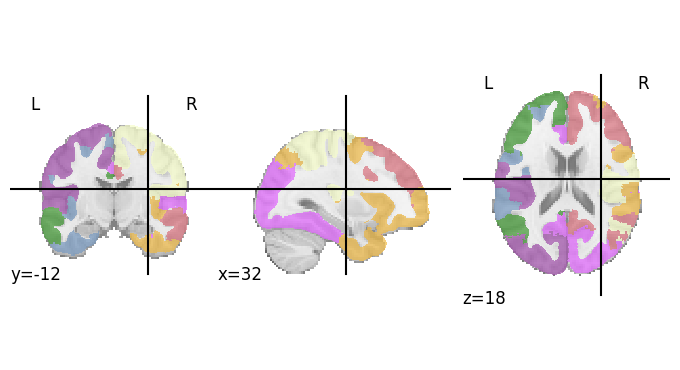

In [2]:
start_time = datetime.now()

# Automatic atlas fetching
#atlas = datasets.fetch_atlas_harvard_oxford('cort-maxprob-thr25-2mm')

save_fig_to = '/Users/ismaila/Documents/C-Codes/SCI_FES_GraphAnalysis'

atlas = datasets.fetch_atlas_schaefer_2018(n_rois=200, yeo_networks=7, resolution_mm=1)
atlas.region_coords = [(-24,-53,-9), (-26,-77,-14),(-45,-69,-8), (-10,-67,-4), (-27,-95,-12), (-14,-44,-3), (-5,-93,-4), (-47,-70,10), (-23,-97,6), (-11,-70,7), (-40,-85,11), (-12,-73,22), (-7,-87,28), (-23,-87,23), (-51,-4,-2), (-53,-24,9), (-37,-21,16), (-55,-4,10), (-53,-22,18), (-56,-8,31), (-47,-9,46), (-7,-12,46), (-49,-28,57), (-40,-25,57), (-31,-46,63), (-32,-22,64), (-26,-38,68),(-20,-11,68), (-5,-29,67), (-19,-31,68), (-43,-48,-19), (-57,-60,-1), (-26,-70,38), (-54,-27,42), (-41,-35,47), (-33,-49,47),  (-17,-73,54),(-29,-60,59), (-6,-60,57), (-17,-53,68), (-31,-4,53), (-22,6,62), (-48,6,29), (-56,-40,20), (-61,-26,28), (-60,-39,36), (-39,-4,-4), (-33,20,5), (-39,1,11), (-51,9,11), (-28,43,31), (-6,9,41), (-11,-35,46), (-6,-3,65), (-24,22,-20), (-10,35,-21), (-29,-6,-39), (-45,-20,-30), (-28,10,-34), (-43,8,-19), (-53,-51,46), (-35,-62,48), (-45,-42,46), (-61,-43,-13), (-32,42,-13), (-42,49,-6), (-28,58,8), (-42,40,16), (-44,20,27), (-43,6,43), (-9,-73,38), (-5,-29,28), (-3,4,30), (-47,8,-33), (-60,-19,-22), (-56,-6,-12), (-58,-30,-4), (-58,-43,7), (-48,-57,18), (-39,-80,31), (-57,-54,28), (-46,-66,38), (-35,20,-13), (-6,36,-10), (-46,31,-7), (-12,63,-6), (-52,22,8), (-6,44,7), (-8,59,21), (-6,30,25), (-11,47,45), (-3,33,43), (-40,19,49), (-24,25,49), (-9,17,63), (-11,-56,13), (-5,-55,27), (-4,-31,36), (-6,-54,42), (-26,-32,-18), (39,-35,-23), (28,-36,-14), (29,-69,-12), (12,-65,-5), (48,-71,-6), (11,-92,-5), (16,-46,-1), (31,-94,-4), (9,-75,9), (22,-60,7), (42,-80,10), (20,-90,22), (11,-74,26), (16,-85,39), (33,-75,32), (51,-15,5), (64,-23,8), (38,-13,15), (44,-27,18), (59,0,10), (56,-11,14), (58,-5,31), (10,-15,41), (51,-22,52), (47,-11,48), (7,-11,51), (40,-24,57), (32,-40,64), (33,-21,65), (29,-34,65), (22,-9,67), (10,-39,69), (6,-23,69), (20,-29,70), (50,-53,-15), (52,-60,9), (59,-16,34), (46,-38,49), (41,-31,46), (15,-73,53), (34,-48,51), (26,-61,58), (8,-56,61), (21,-48,70), (34,-4,52), (26,7,58), (52,11,21), (57,-45,9), (60,-39,17), (60,-26,27), (51,4,40), (41,6,-15), (46,-4,-4),  (36,24,5), (43,7,4), (7,9,41), (11,-36,47), (8,3,66), (12,39,-22), (28,22,-19), (15,64,-8), (30,9,-38), (47,-12,-35), (25,-11,-32), (62,-37,37), (53,-42,48), (37,-63,47), (63,-41,-12), (34,21,-8), (36,46,-13), (29,58,5), (43,45,10), (46,24,26), (30,48,27), (41,33,37), (42,14,49), (14,-70,37), (5,-24,31), (5,3,30), (7,31,28), (7,25,55), (47,-69,27), (54,-50,28), (51,-59,44), (47,13,-30), (61,-13,-21), (55,-6,-10), (63,-27,-6), (52,-31,2), (51,28,0), (5,37,-14), (8,42,4), (6,29,15), (8,58,18), (15,46,44), (29,30,42), (23,24,53), (12,-55,15), (7,-49,31), (6,-58,44)]

# Loading atlas image stored in 'maps'
atlas_filename = atlas.maps
# Loading atlas data stored in 'labels'
labels = atlas.labels
labels = atlas.labels.astype('U') # covert array of bytes to array of strings

# Setting systems' labels
roi = 200
atlas.systems = [None] * roi
atlas.systems[7] = "Visual (LH)"
atlas.systems[22] = "Somatomotor (LH)"
atlas.systems[37] = "Dorsal Attention (LH)"
atlas.systems[49] = "Ventral Attention (LH)"
atlas.systems[57] = "Limbic (LH)"
atlas.systems[67] = "Frontoparietal (LH)"
atlas.systems[87] = "Default (LH)"
atlas.systems[108] = "Visual (RH)"
atlas.systems[125] = "Somatomotor (RH)"
atlas.systems[141] = "Dorsal Attention (RH)"
atlas.systems[153] = "Ventral Attention (RH)"
atlas.systems[161] = "Limbic (RH)"
atlas.systems[173] = "Frontoparietal (RH)"
atlas.systems[191] = "Default (RH)"
systems = atlas.systems

# Define your own list of colors
my_colors = ['#A251AC', '#789AC1', '#409832', '#E165FE', '#F6FDC9', '#EFB944', '#D9717D']

# Create a custom colormap
cmap = ListedColormap(my_colors)

# Plot the ROI and save as PDF
fig = plotting.plot_roi(atlas_filename, cmap=cmap)
fig.savefig(save_fig_to + '/fig/yeo7.pdf', dpi = 300)

print('Atlas ROIs are located in nifti image (4D) at: %s' %atlas_filename)  # 4D data

####  3. setup group labels for load funtional data 

In [3]:
#%% Load the functional datasets (pre mid post FES, NFES) and 
# extract signals (timeseries) on a parcellation defined by labels
# then calculating the correlation and binarized matrices
# ----------------------------------------------------

# masker = NiftiLabelsMasker(labels_img=atlas_filename, standardize=True,
#                            memory='nilearn_cache', verbose=5)

masker = NiftiLabelsMasker(
    labels_img=atlas_filename,
    standardize="zscore_sample",
    standardize_confounds="zscore_sample",
    memory="nilearn_cache",
    verbose=5,
)

data_path = '/Users/ismaila/Documents/C-Codes/SCI_FES_GraphAnalysis/sci_data/fes_data'

# analysis = 'ALL' # 'ALL' subjects or 'SCI' ONLY


# if analysis == "ALL":
#     group = ['pre_fes', 'pre_nfes', 'mid_fes', 'mid_nfes', 'post_fes', 'post_nfes']; 
#     group_label = ['Pre FES', 'Pre Non-FES', 'Post NFES']
# #     group_label = ['Pre FES', 'Pre Non-FES', 'Mid FES','Mid Non-FES', 'Post FES', 'Post Non-FES']

# elif analysis == "Group":
#     group = ['fes', 'nfes']; group_label = ['FES', 'Non-FES']

corr_measure = ConnectivityMeasure(kind='correlation') # kind{“correlation”, “partial correlation”, “tangent”, “covariance”, “precision”}, optional


#### 4. Load fMRI data runs for each group, extract timeseries (ts) and save a copy.

In [4]:
group_label = ['cFES-pre', 'cFES-post', 'c-pre', 'c-post']

#### 5. Load community labels  from matlab

In [5]:
#%% Consensus community label assigment
n_set = 4
# 200xn

## Lee etal Method
S_g1 = sio.loadmat('/Users/ismaila/Documents/C-Codes/SCI_FES_GraphAnalysis/sci_data/SCI/modularity_var/S1_comm_label.mat', squeeze_me=True)['N_all_g1']; #PreFES 
S_g2 = sio.loadmat('/Users/ismaila/Documents/C-Codes/SCI_FES_GraphAnalysis/sci_data/SCI/modularity_var/S2_comm_label.mat', squeeze_me=True)['N_all_g2']; #PreSham 
S_g3 = sio.loadmat('/Users/ismaila/Documents/C-Codes/SCI_FES_GraphAnalysis/sci_data/SCI/modularity_var/S3_comm_label.mat', squeeze_me=True)['N_all_g3']; #PostFES
S_g4 = sio.loadmat('/Users/ismaila/Documents/C-Codes/SCI_FES_GraphAnalysis/sci_data/SCI/modularity_var/S4_comm_label.mat', squeeze_me=True)['N_all_g4']; #PostSham
 
communities = [S_g1, S_g2, S_g3, S_g4]

S1_cFES_pre = S_g1
S2_c_pre = S_g2
S3_cFES_post = S_g3
S4_c_post = S_g4

#### 6. Compute recruitment, Integration, module allegiance values 

In [6]:
atlas = datasets.fetch_atlas_schaefer_2018(n_rois=200, yeo_networks=7, resolution_mm=1)
labels = atlas.labels.astype('U') # covert array of bytes to array of strings
# group_label = ['Pre FES', 'Post FES', 'Pre NFES']
# create static communities (networks' labels)
networks = ['Vis', 'SomMot', 'DorsAttn', 'SalVentAttn', 'Limbic', 'Cont', 'Default']
static_communities = np.zeros((200,))
# find networks in atlas.labels and assign a label[1-7] to each
for i, network in enumerate(networks):   
    idx = np.array([network in s for s in labels], dtype=bool)
    static_communities[idx] = i+1 # 1-7

allegiance, flexibility, integration, recruitment, promiscuity = [], [], [], [], []
allegiance_coarse = []

# Find index where elements change value in static_communities array
pivot = np.where(static_communities[:-1] != static_communities[1:])[0]
pivot = np.concatenate([pivot,[199]]) 

def create_coarse_allegiance(allegiance):
    allegiance_coarse_lr = np.zeros((14,14))
    p1, q1 = 0, 0
    for i, p2 in enumerate(pivot):
        for j, q2 in enumerate(pivot):
            allegiance_coarse_lr[i,j] = np.nanmean(allegiance[p1:p2+1, q1:q2+1])
            q1 = q2+1
        p1 = p2+1
        q1 = 0    
    # If you have an array of shape (K * M, K * N), you can transform it into something of shape (K * K, M, N) using reshape and transpose
    allegiance_coarse = np.mean(allegiance_coarse_lr.reshape(2, 7, 2, 7).transpose(0, 2, 1, 3).reshape(-1, 7, 7), axis=0)   
    return allegiance_coarse

for s in range(n_set):
    
    allegiance.append(communitymeasures.allegiance(communities[s]))  
    flexibility.append(communitymeasures.flexibility(communities[s]))
    integration.append(communitymeasures.integration(communities[s], static_communities))
    recruitment.append(communitymeasures.recruitment(communities[s], static_communities))
    promiscuity.append(communitymeasures.promiscuity(communities[s])) # 0 entails only 1 community. 1 entails all communities
    allegiance_coarse.append(create_coarse_allegiance(allegiance[s]))
        
#plt.imshow(allegiance_coarse[1])
#plt.colorbar()
# 1=pre_fes; 2=pre_nfes; 3=post_fes

# regression between two groups [integration, recruitment]
# define permutation test using monte-carlo method
def perm_test(xs, ys, nmc): 
    n, k = len(xs), 0
    diff = np.abs(np.mean(xs) - np.mean(ys))
    zs = np.concatenate([xs, ys])
    for j in range(nmc):
        np.random.shuffle(zs)
        k += diff < np.abs(np.mean(zs[:n]) - np.mean(zs[n:]))
    return k / nmc


#### 7. Previous permutation test

In [7]:
# # PreFES vs PostFES
# # rec int coeff.
# np.save('/Users/ismaila/Documents/C-Codes/SCI_FES_GraphAnalysis/sci_data/SCI/fc/recruitment_cFES_pre.npy', recruitment[0])
# np.save('/Users/ismaila/Documents/C-Codes/SCI_FES_GraphAnalysis/sci_data/SCI/fc/integration_cFES_pre.npy', integration[0])
# np.save('/Users/ismaila/Documents/C-Codes/SCI_FES_GraphAnalysis/sci_data/SCI/fc/recruitment_c_pre.npy', recruitment[1])
# np.save('/Users/ismaila/Documents/C-Codes/SCI_FES_GraphAnalysis/sci_data/SCI/fc/integration_c_pre.npy', integration[1])
# np.save('/Users/ismaila/Documents/C-Codes/SCI_FES_GraphAnalysis/sci_data/SCI/fc/recruitment_cFES_post.npy', recruitment[2])
# np.save('/Users/ismaila/Documents/C-Codes/SCI_FES_GraphAnalysis/sci_data/SCI/fc/integration_cFES_post.npy', integration[2])
# np.save('/Users/ismaila/Documents/C-Codes/SCI_FES_GraphAnalysis/sci_data/SCI/fc/recruitment_c_post.npy', recruitment[3])
# np.save('/Users/ismaila/Documents/C-Codes/SCI_FES_GraphAnalysis/sci_data/SCI/fc/integration_c_post.npy', integration[3])

# # alg
# np.save('/Users/ismaila/Documents/C-Codes/SCI_FES_GraphAnalysis/sci_data/SCI/fc/allegiance_cFES_pre.npy', allegiance[0])
# np.save('/Users/ismaila/Documents/C-Codes/SCI_FES_GraphAnalysis/sci_data/SCI/fc/allegiance_c_pre.npy', allegiance[1])
# np.save('/Users/ismaila/Documents/C-Codes/SCI_FES_GraphAnalysis/sci_data/SCI/fc/allegiance_cFES_post.npy', allegiance[2])
# np.save('/Users/ismaila/Documents/C-Codes/SCI_FES_GraphAnalysis/sci_data/SCI/fc/allegiance_c_post.npy', allegiance[3])
# # corr mxt
# np.save('/Users/ismaila/Documents/C-Codes/SCI_FES_GraphAnalysis/sci_data/SCI/fc/corr_cFES_pre.npy', corr_g1_mean)
# np.save('/Users/ismaila/Documents/C-Codes/SCI_FES_GraphAnalysis/sci_data/SCI/fc/corr_c_pre.npy', corr_g2_mean)
# np.save('/Users/ismaila/Documents/C-Codes/SCI_FES_GraphAnalysis/sci_data/SCI/fc/corr_cFES_post.npy', corr_g5_mean)
# np.save('/Users/ismaila/Documents/C-Codes/SCI_FES_GraphAnalysis/sci_data/SCI/fc/corr_c_post.npy', corr_g6_mean)


# print(f'File saved!')

In [8]:
# Load the data from the .npy files
os.chdir('/Users/ismaila/Documents/C-Codes/SCI_FES_GraphAnalysis/sci_data/SCI/fc/')
cFES_pre_rec = np.load('recruitment_cFES_pre.npy')
cFES_pre_int = np.load('integration_cFES_pre.npy')

c_pre_rec = np.load('recruitment_c_pre.npy')
c_pre_int = np.load('integration_c_pre.npy')

cFES_post_rec = np.load('recruitment_cFES_post.npy')
cFES_post_int = np.load('integration_cFES_post.npy')

c_post_rec = np.load('recruitment_c_post.npy')
c_post_int = np.load('integration_c_post.npy')

alg_cFES_pre = np.load('allegiance_cFES_pre.npy')
alg_c_pre = np.load('allegiance_c_pre.npy')

alg_cFES_post = np.load('allegiance_cFES_post.npy')
alg_c_post = np.load('allegiance_c_post.npy')

# corr_prefes, corr_presham, corr_postfes, corr_postsham
corr_cFES_pre = np.load('corr_cFES_pre.npy')
corr_c_pre = np.load('corr_c_pre.npy')

corr_cFES_post = np.load('corr_cFES_post.npy')
corr_c_post = np.load('corr_c_post.npy')

print(alg_cFES_pre.shape)
# cFES_pre', 'cFES_post', 'c_pre', 'c_post'

(200, 200)


In [9]:
# Previous permutation test
# def perm_test_integration(s1, s2, nmc):
#     n, k = np.shape(s1)[1], 0
#     int_s1 = communitymeasures.integration(s1, static_communities)
#     int_s2 = communitymeasures.integration(s2, static_communities)
#     diff = np.abs(int_s2 - int_s1)
#     for i in range(nmc): # permute/shuffle community assignment among both groups
#         sp = np.random.permutation(np.concatenate((s1, s2), axis=1).T).T
#         sp1, sp2 = sp[:,:n], sp[:,n:]
#         int_sp1 = communitymeasures.integration(sp1, static_communities)
#         int_sp2 = communitymeasures.integration(sp2, static_communities)
#         k += diff < np.abs(int_sp2 - int_sp1)
#         if i % 10 == 0:
#             print('permutation #: ', i) 
#     return k / nmc

# def perm_test_recruitment(s1, s2, nmc):
#     n, k = np.shape(s1)[1], 0
#     rec_s1 = communitymeasures.recruitment(s1, static_communities)
#     rec_s2 = communitymeasures.recruitment(s2, static_communities)
#     diff = np.abs(rec_s2 - rec_s1)
#     for i in range(nmc): # permute/shuffle community assignment among both groups
#         sp = np.random.permutation(np.concatenate((s1, s2), axis=1).T).T
#         sp1, sp2 = sp[:,:n], sp[:,n:]
#         rec_sp1 = communitymeasures.recruitment(sp1, static_communities)
#         rec_sp2 = communitymeasures.recruitment(sp2, static_communities)
#         k += diff < np.abs(rec_sp2 - rec_sp1)
#         if i % 10 == 0:
#             print('permutation #: ', i) 
#     return k / nmc


# def perm_test_allegiance(s1, s2, nmc):
#     n, k = np.shape(s1)[1], 0
#     alg_s1 = communitymeasures.allegiance(s1)
#     alg_s2 = communitymeasures.allegiance(s2)
#     diff = np.abs(alg_s2 - alg_s1)
#     for i in range(nmc): # permute/shuffle community assignment among both groups
#         sp = np.random.permutation(np.concatenate((s1, s2), axis=1).T).T 
#         sp1, sp2 = sp[:,:n], sp[:,n:]
#         alg_sp1 = communitymeasures.allegiance(sp1)
#         alg_sp2 = communitymeasures.allegiance(sp2)
#         k += diff < np.abs(alg_sp2 - alg_sp1)
#         if i % 10 == 0:
#             print('permutation #: ', i) 
#     return k / nmc

# pvalue = perm_test_allegiance(S_g1, S_g3, nmc=20000)
# print(f'Shape pvalue: {pvalue.shape} {allegiance[0].shape} {allegiance[2].shape}')
 
# Automatic atlas fetching
atlas = datasets.fetch_atlas_schaefer_2018(n_rois=200, yeo_networks=7, resolution_mm=1)
atlas.region_coords = [(-24,-53,-9), (-26,-77,-14),(-45,-69,-8), (-10,-67,-4), (-27,-95,-12), (-14,-44,-3), (-5,-93,-4), (-47,-70,10), (-23,-97,6), (-11,-70,7), (-40,-85,11), (-12,-73,22), (-7,-87,28), (-23,-87,23), (-51,-4,-2), (-53,-24,9), (-37,-21,16), (-55,-4,10), (-53,-22,18), (-56,-8,31), (-47,-9,46), (-7,-12,46), (-49,-28,57), (-40,-25,57), (-31,-46,63), (-32,-22,64), (-26,-38,68),(-20,-11,68), (-5,-29,67), (-19,-31,68), (-43,-48,-19), (-57,-60,-1), (-26,-70,38), (-54,-27,42), (-41,-35,47), (-33,-49,47),  (-17,-73,54),(-29,-60,59), (-6,-60,57), (-17,-53,68), (-31,-4,53), (-22,6,62), (-48,6,29), (-56,-40,20), (-61,-26,28), (-60,-39,36), (-39,-4,-4), (-33,20,5), (-39,1,11), (-51,9,11), (-28,43,31), (-6,9,41), (-11,-35,46), (-6,-3,65), (-24,22,-20), (-10,35,-21), (-29,-6,-39), (-45,-20,-30), (-28,10,-34), (-43,8,-19), (-53,-51,46), (-35,-62,48), (-45,-42,46), (-61,-43,-13), (-32,42,-13), (-42,49,-6), (-28,58,8), (-42,40,16), (-44,20,27), (-43,6,43), (-9,-73,38), (-5,-29,28), (-3,4,30), (-47,8,-33), (-60,-19,-22), (-56,-6,-12), (-58,-30,-4), (-58,-43,7), (-48,-57,18), (-39,-80,31), (-57,-54,28), (-46,-66,38), (-35,20,-13), (-6,36,-10), (-46,31,-7), (-12,63,-6), (-52,22,8), (-6,44,7), (-8,59,21), (-6,30,25), (-11,47,45), (-3,33,43), (-40,19,49), (-24,25,49), (-9,17,63), (-11,-56,13), (-5,-55,27), (-4,-31,36), (-6,-54,42), (-26,-32,-18), (39,-35,-23), (28,-36,-14), (29,-69,-12), (12,-65,-5), (48,-71,-6), (11,-92,-5), (16,-46,-1), (31,-94,-4), (9,-75,9), (22,-60,7), (42,-80,10), (20,-90,22), (11,-74,26), (16,-85,39), (33,-75,32), (51,-15,5), (64,-23,8), (38,-13,15), (44,-27,18), (59,0,10), (56,-11,14), (58,-5,31), (10,-15,41), (51,-22,52), (47,-11,48), (7,-11,51), (40,-24,57), (32,-40,64), (33,-21,65), (29,-34,65), (22,-9,67), (10,-39,69), (6,-23,69), (20,-29,70), (50,-53,-15), (52,-60,9), (59,-16,34), (46,-38,49), (41,-31,46), (15,-73,53), (34,-48,51), (26,-61,58), (8,-56,61), (21,-48,70), (34,-4,52), (26,7,58), (52,11,21), (57,-45,9), (60,-39,17), (60,-26,27), (51,4,40), (41,6,-15), (46,-4,-4),  (36,24,5), (43,7,4), (7,9,41), (11,-36,47), (8,3,66), (12,39,-22), (28,22,-19), (15,64,-8), (30,9,-38), (47,-12,-35), (25,-11,-32), (62,-37,37), (53,-42,48), (37,-63,47), (63,-41,-12), (34,21,-8), (36,46,-13), (29,58,5), (43,45,10), (46,24,26), (30,48,27), (41,33,37), (42,14,49), (14,-70,37), (5,-24,31), (5,3,30), (7,31,28), (7,25,55), (47,-69,27), (54,-50,28), (51,-59,44), (47,13,-30), (61,-13,-21), (55,-6,-10), (63,-27,-6), (52,-31,2), (51,28,0), (5,37,-14), (8,42,4), (6,29,15), (8,58,18), (15,46,44), (29,30,42), (23,24,53), (12,-55,15), (7,-49,31), (6,-58,44)]
label = atlas.labels.astype('U') # covert array of bytes to array of strings

color = (['purple']*14) + (['blue']*16) + (['green']*13) + (['violet']*11) + (['moccasin']*6) + (['orange']*13) + (['red']*27) + (['purple']*15) + (['blue']*19) + (['green']*13) + (['violet']*11) + (['moccasin']*6) + (['orange']*17) + (['red']*19)

#### 8.  Permutation-based Friedman Test

In [10]:
# Statistical tests: Allegiance Matrix | Recruitment & Integration Coeffiencent

In [11]:
# *Non-parallel version (takes time to finish)

# import numpy as np
# from scipy.stats import rankdata

# def perm_test_friedman(pre_labels, post_labels, nmc):
#     """
#     Permutation-based Friedman test for detecting differences in allegiance matrices
#     before and after intervention (e.g., FES).

#     Parameters:
#     - pre_labels: np.array (R, S1) community assignments (Pre-intervention)
#     - post_labels: np.array (R, S2) community assignments (Post-intervention)
#     - nmc: int, number of Monte Carlo permutations

#     Returns:
#     - p_values: np.array (R, R), empirical p-values per brain region pair
#     """
#     R, S_pre = pre_labels.shape
#     _, S_post = post_labels.shape

#     # Compute original allegiance matrices
#     alg_pre = communitymeasures.allegiance(pre_labels)   # (R, R)
#     alg_post = communitymeasures.allegiance(post_labels) # (R, R)

#     # Stack allegiance matrices along a new axis to create shape (subjects, conditions, region_pair)
#     diff = np.abs(alg_post - alg_pre)

#     exceedances = np.zeros((R, R))

#     for k in range(nmc):
#         # Flip labels for a subset of subjects
#         flip_mask_pre = np.random.rand(S_pre) < 0.5
#         flip_mask_post = np.random.rand(S_post) < 0.5

#         perm_pre = pre_labels.copy()
#         perm_post = post_labels.copy()

#         perm_pre[:, flip_mask_pre] = post_labels[:, :S_pre][:, flip_mask_pre]
#         perm_post[:, flip_mask_post] = pre_labels[:, :S_post][:, flip_mask_post]

#         # Compute allegiance for permuted data
#         alg_perm_pre = communitymeasures.allegiance(perm_pre)
#         alg_perm_post = communitymeasures.allegiance(perm_post)

#         diff_perm = np.abs(alg_perm_post - alg_perm_pre)
#         exceedances += diff_perm >= diff

#         if k % 10 == 0:
#             print(f"Permutation #: {k}")

#     # Calculate empirical p-values
#     p_values = exceedances / nmc
#     return p_values


In [12]:

# Allegiance matrix
def single_permutation(pre_labels, post_labels, S_pre, S_post, R, diff):
    perm_pre = pre_labels.copy()
    perm_post = post_labels.copy()

    flip_mask_pre = np.random.rand(S_pre) < 0.5
    flip_mask_post = np.random.rand(S_post) < 0.5

    # Ensure index alignment for swapping
    min_len = min(S_pre, S_post)
    flip_mask = np.random.rand(min_len) < 0.5

    perm_pre[:, :min_len][:, flip_mask] = post_labels[:, :min_len][:, flip_mask]
    perm_post[:, :min_len][:, flip_mask] = pre_labels[:, :min_len][:, flip_mask]

    alg_perm_pre = communitymeasures.allegiance(perm_pre)
    alg_perm_post = communitymeasures.allegiance(perm_post)

    diff_perm = np.abs(alg_perm_post - alg_perm_pre)
    return (diff_perm >= diff).astype(int)

def perm_test_friedman_par(pre_labels, post_labels, nmc=1000, n_jobs=-1):
    """
    Parallelized permutation-based Friedman test with progress bar.

    Parameters:
    - pre_labels: (R, S1) array
    - post_labels: (R, S2) array
    - nmc: Number of permutations
    - n_jobs: Parallel jobs (default: -1 for all cores)

    Returns:
    - p_values: (R, R) p-value matrix
    """
    R, S_pre = pre_labels.shape
    _, S_post = post_labels.shape

    # Compute original allegiance difference
    alg_pre = communitymeasures.allegiance(pre_labels)
    alg_post = communitymeasures.allegiance(post_labels)
    diff = np.abs(alg_post - alg_pre)

    # Run permutations in parallel with progress bar
    results = Parallel(n_jobs=n_jobs)(
        delayed(single_permutation)(pre_labels, post_labels, S_pre, S_post, R, diff)
        for _ in tqdm(range(nmc), desc="Running permutations")
    )

    exceedances = np.sum(results, axis=0)
    p_values = exceedances / nmc
    return p_values


In [13]:
alg_pvalue = perm_test_friedman_par(S1_cFES_pre, S3_cFES_post, nmc=10000, n_jobs=8)
print(alg_pvalue.shape)



# def run_parallel_test():
#     alg_pvalue = perm_test_friedman_par(S1_cFES_pre, S3_cFES_post, nmc=100, n_jobs=8)
#     print(alg_pvalue.shape)

# if __name__ == "__main__":
#     run_parallel_test()

# S1_cFES_pre = S_g1
# S2_c_pre = S_g2
# S3_cFES_post = S_g3
# S4_c_post = S_g4

Running permutations:   0%|                           | 0/10000 [00:00<?, ?it/s]Assuming non interactive session since isatty found missing
Assuming non interactive session since isatty found missing
Assuming non interactive session since isatty found missing
Assuming non interactive session since isatty found missing
Assuming non interactive session since isatty found missing
Assuming non interactive session since isatty found missing
Assuming non interactive session since isatty found missing
Assuming non interactive session since isatty found missing
/Users/ismaila/anaconda3/envs/analysis/lib/python3.11/site-packages/nilearn/input_data/__init__.py:23: FutureWarning: The import path 'nilearn.input_data' is deprecated in version 0.9. Importing from 'nilearn.input_data' will be possible at least until release 0.13.0. Please import from 'nilearn.maskers' instead.
  warnings.warn(message, FutureWarning)
/Users/ismaila/anaconda3/envs/analysis/lib/python3.11/site-packages/nilearn/input_dat

(200, 200)


In [15]:
# Recruitment coefficient
static_communities = np.zeros((200,))
def perm_test_friedman_parallel_rec(s1, s2, nmc=1000, n_jobs=-1):
    """
    Parallelized permutation-based Friedman test for recruitment differences.

    Parameters:
    - s1: np.array (R, N1) - community labels from group 1
    - s2: np.array (R, N2) - community labels from group 2
    - static_communities: np.array or list defining static communities for recruitment
    - nmc: int - number of permutations
    - n_jobs: int - number of CPU cores to use (-1 means all available)

    Returns:
    - p_values: np.array (R,) or shape of recruitment matrices
    """

    R, N1 = s1.shape
    N2 = s2.shape[1]
    combined = np.concatenate((s1, s2), axis=1)
    rec_s1 = communitymeasures.recruitment(s1, static_communities)
    rec_s2 = communitymeasures.recruitment(s2, static_communities)
    diff = np.abs(rec_s2 - rec_s1)
    exceedances = np.zeros_like(diff)

    def perm_step(_):
        sp = np.random.permutation(combined.T).T
        sp1, sp2 = sp[:, :N1], sp[:, N1:]
        rec1 = communitymeasures.recruitment(sp1, static_communities)
        rec2 = communitymeasures.recruitment(sp2, static_communities)
        return (np.abs(rec2 - rec1) >= diff).astype(int)

    results = Parallel(n_jobs=n_jobs)(
        delayed(perm_step)(i) for i in tqdm(range(nmc), desc="Permuting (recruitment)")
    )

    for res in results:
        exceedances += res

    p_values = exceedances / nmc
    return p_values


In [16]:
rec_pvalue = perm_test_friedman_parallel_rec(S1_cFES_pre, S3_cFES_post, nmc=10000, n_jobs=8)
print(f"Recruitment p-value matrix shape: {rec_pvalue.shape}")


Permuting (recruitment):   0%|                        | 0/10000 [00:00<?, ?it/s]Assuming non interactive session since isatty found missing
Assuming non interactive session since isatty found missing
Assuming non interactive session since isatty found missing
Assuming non interactive session since isatty found missing
Assuming non interactive session since isatty found missing
Assuming non interactive session since isatty found missing
Assuming non interactive session since isatty found missing
Assuming non interactive session since isatty found missing
/Users/ismaila/anaconda3/envs/analysis/lib/python3.11/site-packages/nilearn/input_data/__init__.py:23: FutureWarning: The import path 'nilearn.input_data' is deprecated in version 0.9. Importing from 'nilearn.input_data' will be possible at least until release 0.13.0. Please import from 'nilearn.maskers' instead.
  warnings.warn(message, FutureWarning)
/Users/ismaila/anaconda3/envs/analysis/lib/python3.11/site-packages/nilearn/input_dat

Recruitment p-value matrix shape: (200,)


In [17]:
# Integration Coefficient
def perm_test_friedman_parallel_int(s1, s2, nmc=1000, n_jobs=-1):
    """
    Parallel permutation-based Friedman test on integration differences between two groups.

    Parameters:
    - s1: np.array (R, N1): Community assignments for group 1 (e.g., pre-intervention)
    - s2: np.array (R, N2): Community assignments for group 2 (e.g., post-intervention)
    - static_communities: list or array of community labels used to compute integration
    - nmc: int: Number of Monte Carlo permutations
    - n_jobs: int: Number of CPU cores to use (-1 = all)

    Returns:
    - p_values: np.array with shape equal to integration output (e.g., (C, C))
    """

    R, N1 = s1.shape
    N2 = s2.shape[1]
    combined = np.concatenate((s1, s2), axis=1)

    # Compute observed integration matrices
    int_s1 = communitymeasures.integration(s1, static_communities)
    int_s2 = communitymeasures.integration(s2, static_communities)
    diff = np.abs(int_s2 - int_s1)
    exceedances = np.zeros_like(diff)

    def perm_step(_):
        sp = np.random.permutation(combined.T).T
        sp1, sp2 = sp[:, :N1], sp[:, N1:]
        int1 = communitymeasures.integration(sp1, static_communities)
        int2 = communitymeasures.integration(sp2, static_communities)
        return (np.abs(int2 - int1) >= diff).astype(int)

    # Parallel processing with progress bar
    results = Parallel(n_jobs=n_jobs)(
        delayed(perm_step)(i) for i in tqdm(range(nmc), desc="Permuting (integration)")
    )

    for res in results:
        exceedances += res

    p_values = exceedances / nmc
    return p_values


In [18]:
int_pvalue = perm_test_friedman_parallel_int(S1_cFES_pre, S3_cFES_post, nmc=10000, n_jobs=8) # 20,000
print(f"Integration p-value matrix shape: {int_pvalue.shape}")

/Users/ismaila/anaconda3/envs/analysis/lib/python3.11/site-packages/teneto/communitymeasures/integration.py:47: RuntimeWarning: Mean of empty slice
  integration_coeff[i] = np.nanmean(alleg[i, staticcommunities != statcom])
Permuting (integration):   0%|                        | 0/10000 [00:00<?, ?it/s]/Users/ismaila/anaconda3/envs/analysis/lib/python3.11/site-packages/teneto/communitymeasures/integration.py:47: RuntimeWarning: Mean of empty slice
  integration_coeff[i] = np.nanmean(alleg[i, staticcommunities != statcom])
/Users/ismaila/anaconda3/envs/analysis/lib/python3.11/site-packages/teneto/communitymeasures/integration.py:47: RuntimeWarning: Mean of empty slice
  integration_coeff[i] = np.nanmean(alleg[i, staticcommunities != statcom])
/Users/ismaila/anaconda3/envs/analysis/lib/python3.11/site-packages/teneto/communitymeasures/integration.py:47: RuntimeWarning: Mean of empty slice
  integration_coeff[i] = np.nanmean(alleg[i, staticcommunities != statcom])
/Users/ismaila/anaconda3

Integration p-value matrix shape: (200,)


#### 9. Show scattered plot of PreFES vs PostFES recruitment and integration coefficients.  

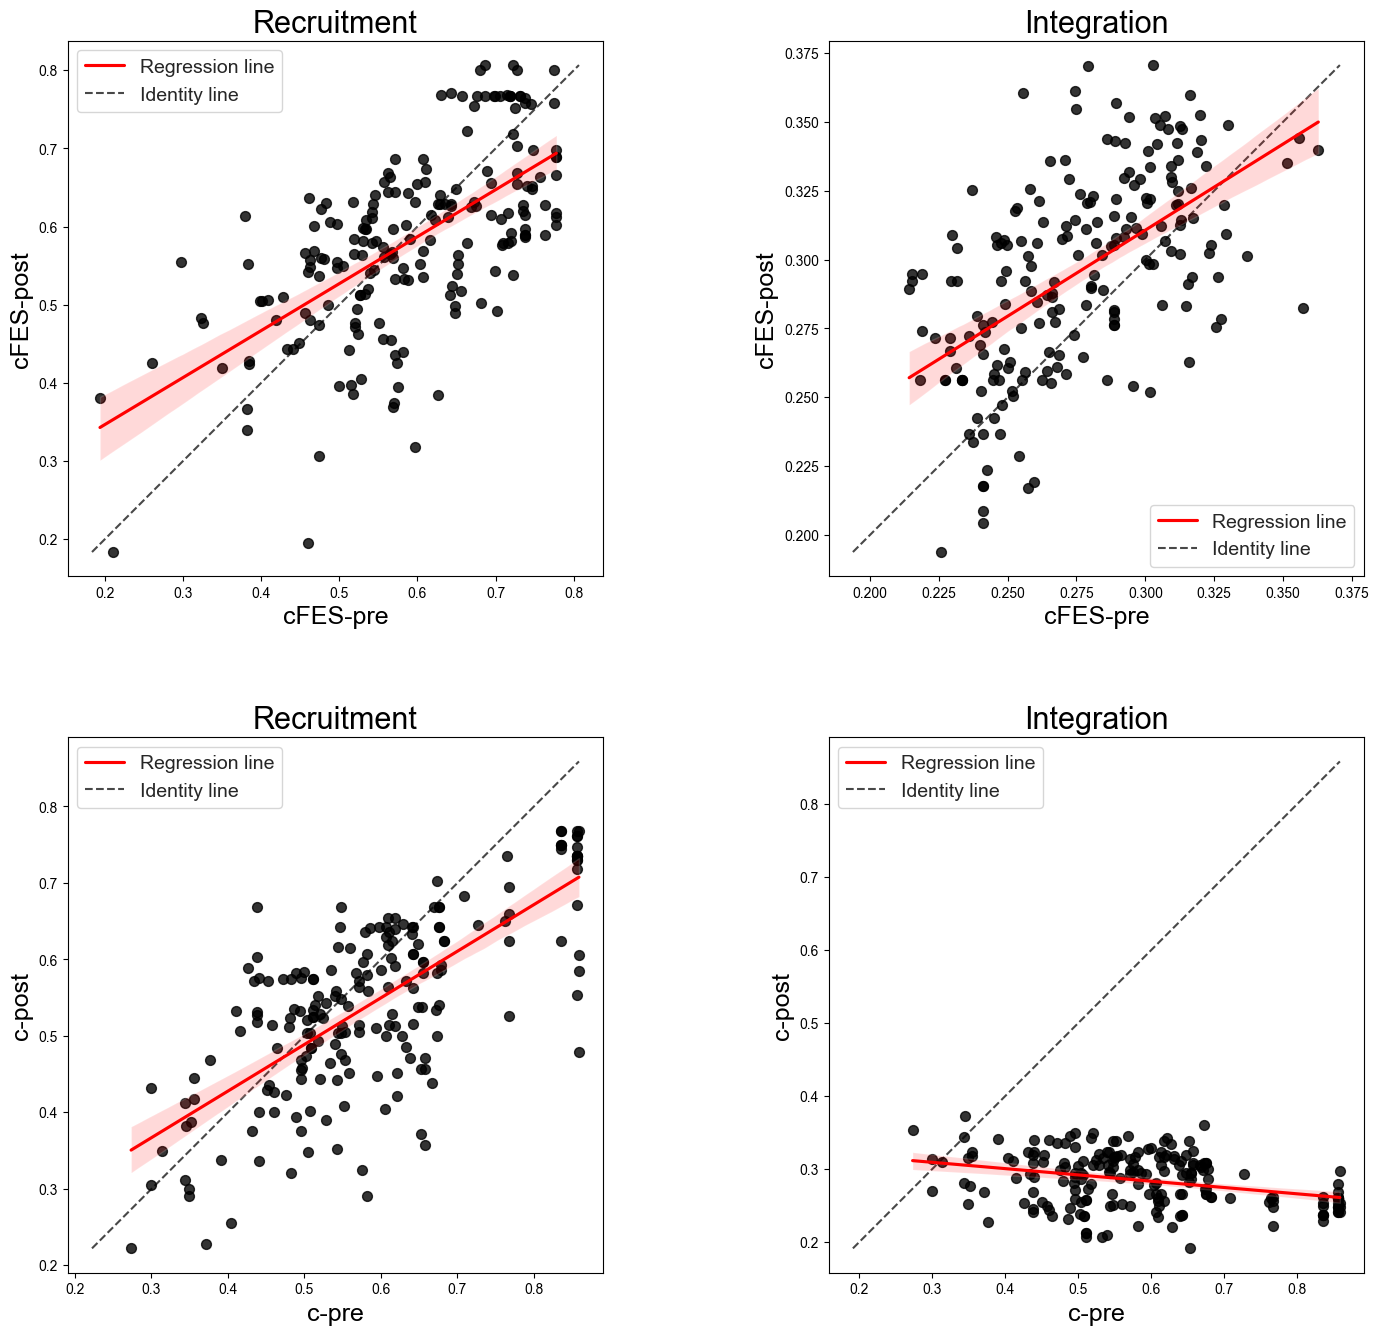

In [19]:
# Define figure and subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(18, 16))
(ax1, ax2), (ax3, ax4) = axes
sns.set(style='white')

# Function to plot regression with identity line
def plot_regression(ax, x, y, xlabel, ylabel, title):
    sns.regplot(x=x, y=y, ci=95, scatter_kws={"color": "black", "s": 50}, 
                line_kws={"color": "red", 'label': 'Regression line'}, ax=ax)
    ax.set_xlabel(xlabel, fontsize=18)
    ax.set_ylabel(ylabel, fontsize=18)
    ax.set_title(title, fontsize=22)

    # Define identity line limits
    lims = [min(np.min(x), np.min(y)), max(np.max(x), np.max(y))]
    ax.plot(lims, lims, 'k--', alpha=0.8, zorder=0, label='Identity line')
    ax.set_xlim(lims)
    ax.set_ylim(lims)
    ax.axis('square')
    ax.legend(loc="best", fontsize=14)

# cFES_pre vs cFES_post Rec/Int
plot_regression(ax1, cFES_pre_rec, cFES_post_rec, group_label[0], group_label[1], 'Recruitment')
perm_test(cFES_pre_rec, cFES_post_rec, 20000)

plot_regression(ax2, cFES_pre_int, cFES_post_int, group_label[0], group_label[1], 'Integration')
perm_test(cFES_pre_int, cFES_post_int, 20000)


# c-pre vs c-Post
plot_regression(ax3, c_pre_rec, c_post_rec, group_label[2], group_label[3], 'Recruitment')
perm_test(c_pre_rec, c_post_rec, 20000)

plot_regression(ax4, c_pre_rec, c_post_int, group_label[2], group_label[3], 'Integration')
perm_test(c_pre_rec, c_post_int, 20000)

# Adjust layout and show the figure
# plt.tight_layout(pad=2.0)

plt.subplots_adjust(hspace=0.3) 
plt.subplots_adjust(wspace=0.2)

plt.show()

# c_pre_rec
# cFES_pre_rec
# cFES_post_rec

# cFES_pre_int
# cFES_post_int
# group_label = ['cFES-pre', 'cFES-post', 'c-pre', 'c-post']

In [ ]:
# cFES_pre', 'cFES_post', 'c_pre', 'c_post'

### Statistical tests

In [20]:
# corr_a = corr_cFES_pre
# corr_b = corr_cFES_post

# # corr_a = corr_c_pre
# # corr_b = corr_c_post

# # corr_a = corr_cFES_pre
# # corr_b = corr_c_pre

# # SMN Region
# s1 = corr_a[14:30, 14:30]     # Shape (16, 16)
# s2 = corr_a[14:30, 115:134]   # Shape (16, 19)
# s3 = corr_a[115:134, 14:30]   # Shape (19, 16)
# s4 = corr_a[115:134, 115:134] # Shape (19, 19)

# print(f'Shape pvalue: {s1.shape} {s2.shape} {s3.shape} {s4.shape}')

# # Stack slices to form a 35x35 matrix
# top_half = np.hstack((s1, s2))  # Shape (16, 35)
# bottom_half = np.hstack((s3, s4))  # Shape (19, 35)

# fc_smn_matrix_a = np.vstack((top_half, bottom_half))  # Shape (35, 35)

# # Print the shape of the resulting matrix
# print("FC of SMN matrix cFES_pre:", fc_smn_matrix_a.shape)

# # 
# # Slice rows and columns from 15:31 and 116:135
# s1 = corr_b[14:30, 14:30]     # Shape (16, 16)
# s2 = corr_b[14:30, 115:134]   # Shape (16, 19)
# s3 = corr_b[115:134, 14:30]   # Shape (19, 16)
# s4 = corr_b[115:134, 115:134] # Shape (19, 19)

# # Stack slices to form a 35x35 matrix
# top_half = np.hstack((s1, s2))  # Shape (16, 35)
# bottom_half = np.hstack((s3, s4))  # Shape (19, 35)

# fc_smn_matrix_b = np.vstack((top_half, bottom_half))  # Shape (35, 35)

# # Print the shape of the resulting matrix
# print("FC of SMN matrix c_pre:", fc_smn_matrix_b.shape)

In [21]:
# ************* # cFES_pre', 'cFES_post', 'c_pre', 'c_post'
# Group #1
x_rec = cFES_pre_rec
z_rec = cFES_post_rec
x_in = cFES_pre_int
z_in = cFES_post_int

# Group #2
# x_rec = c_pre_rec
# z_rec = c_post_rec
# x_in = c_pre_int
# z_in = c_post_int

# Group #3
# x_rec = cFES_pre_rec
# z_rec = c_pre_rec
# x_in = cFES_pre_int
# z_in = c_pre_int

slice1 = x_rec[14:30]   
slice2 = x_rec[115:134]  
x_rec_SMN = np.concatenate((slice1, slice2))
print(x_rec_SMN.shape) 

slice1 = z_rec[14:30]   
slice2 = z_rec[115:134]  
z_rec_SMN = np.concatenate((slice1, slice2))
print(z_rec_SMN.shape) 

slice1 = x_in[14:30]   
slice2 = x_in[115:134]  
x_in_SMN = np.concatenate((slice1, slice2))
print(x_in_SMN.shape) 

slice1 = z_in[14:30]   
slice2 = z_in[115:134]  
z_in_SMN = np.concatenate((slice1, slice2))
print(z_in_SMN.shape)

# x_rec_SMN z_rec_SMN x_in_SMN z_in_SMN

(35,)
(35,)
(35,)
(35,)


In [22]:
# S1_cFES_pre, S2_c_pre, S3_cFES_post, S4_c_post

S1_a = S1_cFES_pre
S1_b = S3_cFES_post

# S1_a = S2_c_pre
# S1_b = S4_c_post

# S1_a = S1_cFES_pre
# S1_b = S2_c_pre

slice1 = S1_a[14:30, :]  
slice2 = S1_a[115:134, :] 
S1_a_SMN = np.vstack((slice1, slice2))
print(f'SMN cFES_pre shape: {S1_a_SMN.shape}') 

slice1 = S1_b[14:30, :]  
slice2 = S1_b[115:134, :] 
S1_b_SMN = np.vstack((slice1, slice2))
print(f'SMN cFES_post shape: {S1_b_SMN.shape}') 

SMN cFES_pre shape: (35, 14)
SMN cFES_post shape: (35, 14)


In [23]:
# SMN Perm-test cFES_pre - cFES_post
static_communities = np.zeros((35,))
# pvalue_int1 = perm_test_integration(S1_a_SMN, S1_b_SMN, nmc=20000) ##  
# pvalue_rec1 = perm_test_recruitment(S1_a_SMN, S1_b_SMN, nmc=20000) ##

pvalue_rec = perm_test_friedman_parallel_rec(S1_a_SMN, S1_b_SMN, nmc=20000, n_jobs=8)
pvalue_int = perm_test_friedman_parallel_int(S1_a_SMN, S1_b_SMN, nmc=20000, n_jobs=8) # 20,000

Permuting (recruitment):   0%|                | 8/20000 [00:00<04:10, 79.91it/s]Assuming non interactive session since isatty found missing
Assuming non interactive session since isatty found missing
Assuming non interactive session since isatty found missing
Assuming non interactive session since isatty found missing
Assuming non interactive session since isatty found missing
Assuming non interactive session since isatty found missing
Assuming non interactive session since isatty found missing
Assuming non interactive session since isatty found missing
/Users/ismaila/anaconda3/envs/analysis/lib/python3.11/site-packages/nilearn/input_data/__init__.py:23: FutureWarning: The import path 'nilearn.input_data' is deprecated in version 0.9. Importing from 'nilearn.input_data' will be possible at least until release 0.13.0. Please import from 'nilearn.maskers' instead.
  warnings.warn(message, FutureWarning)
/Users/ismaila/anaconda3/envs/analysis/lib/python3.11/site-packages/nilearn/input_dat

In [24]:
print(f'pvalue_rec: {pvalue_rec.shape} | pvalue_int: {pvalue_int.shape} ')

pvalue_rec: (35,) | pvalue_int: (35,) 


#### 12. Plot brain glass visualization (significant regions of recruitment and integration coefficients)  

In [25]:
analysis = 'Pre vs Post'
diff_rec_abs1 = abs(cFES_pre_rec - cFES_post_rec)
diff_int_abs1 = abs(cFES_pre_int - cFES_post_int)

# diff_rec_abs1 = abs(c_pre_rec - c_post_rec)
# diff_int_abs1 = abs(c_pre_int - c_post_int)

# diff_rec_abs1 = abs(cFES_pre_rec - c_pre_rec)
# diff_int_abs1 = abs(cFES_pre_int - c_pre_int)


diff_rec1 = diff_rec_abs1 
diff_int1 = diff_int_abs1 
idx = 0
# Function to validate and plot markers
def plot_markers(coords, color, size, output_path, idx):
    if len(coords) == len(color) == len(size) and len(coords) > 0:
        # Proceed with plotting only if the lengths of arrays match and they are not empty
        # idx=idx+1
        print(f'View: {idx}')
        view = plotting.view_markers(coords, color, marker_size=np.array(size))  # marker_labels can be added
        view.open_in_browser()
        view.save_as_html(output_path)

    else:
        print(f"Skipping plot {idx}. Coordinates, colors, or sizes are either mismatched or empty. "
              f"coords: {len(coords)}, colors: {len(color)}, sizes: {len(size)}")
        # idx=idx+1
        
color_gb = ['lime', 'lime', 'lime', 'lime', 'lime', 'lime','lime','cyan','cyan','cyan','cyan','cyan','cyan','cyan','cyan','cyan',
         'lime','lime','lime','lime','lime','lime','lime','cyan','cyan','cyan','cyan','cyan','cyan','cyan','cyan','cyan','cyan'
         ,'cyan','cyan']
# Recruitment pre-post
sig_rec2 = np.where((diff_rec1 >= 0.0))[0] #(diff_rec1 >= 0.2) & (pvalue_rec1 == 0)
sig_rec2_f = [i for i in sig_rec2 if color[i] == 'blue']
coords_g2 = [atlas.region_coords[i] for i in sig_rec2_f]
color_g2 = [color[i] for i in sig_rec2_f]
size_g2 = [int(diff_rec1[i] * 200) for i in sig_rec2_f]
# coords_g2 = [atlas.region_coords[i] for i in sig_rec2]
# color_g2 = [color[i] for i in sig_rec2]
# size_g2 = [int(diff_rec[i] * 100) for i in sig_rec2]
idx=idx+1
plot_markers(coords_g2, color_g2, size_g2, '/Users/ismaila/Documents/C-Codes/SCI_FES_GraphAnalysis/fig/diff_recruitment_prefes_postfes' + analysis + '.html', idx)
# color_gb

# Integration pre-post
sig_int4 = np.where((diff_int1 >= 0.0) )[0] #& (pvalue_int1 == 0)
filtered_sig_int4 = [i for i in sig_int4 if color[i] == 'blue']
coords_g4 = [atlas.region_coords[i] for i in filtered_sig_int4]
color_g4 = [color[i] for i in filtered_sig_int4]
size_g4 = [int(diff_int1[i] * 200) for i in filtered_sig_int4]

idx = idx+1
plot_markers(coords_g4, color_g4, size_g4, '/Users/ismaila/Documents/C-Codes/SCI_FES_GraphAnalysis/fig/diff_integration_prefes_postfes' + analysis + '.html', idx)
# View 1 = Rec PreFES vs PostFES
# View 2 = Int PreFES vs PostFES

View: 1
View: 2


In [26]:
# diff_rec = diff_rec_abs
diff_rec1 = diff_rec_abs1
# diff_int = diff_int_abs
diff_int1 = diff_int_abs1 
idx = 0

lime = (0, 1, 1)
cyan = (0, 1, 0)


# Function to validate and plot markers
def plot_markers(coords, color, size, output_path, idx):
    if len(coords) == len(color) == len(size) and len(coords) > 0:
        # Proceed with plotting only if the lengths of arrays match and they are not empty
        # idx=idx+1
        print(f'View: {idx}')
        view = plotting.view_markers(coords, color, marker_size=np.array(size))  # marker_labels can be added
        view.open_in_browser()
        view.save_as_html(output_path)

    else:
        print(f"Skipping plot {idx}. Coordinates, colors, or sizes are either mismatched or empty. "
              f"coords: {len(coords)}, colors: {len(color)}, sizes: {len(size)}")
        # idx=idx+1

        
# color_g2b = ['purple', cyan, lime, lime, lime, lime, lime, lime, lime, lime, 'green','violet', lime,
#               lime, lime, lime, lime, lime, lime, lime, lime, lime, lime,'green','orange','orange','red']
color_gb = ['lime', 'lime', 'lime', 'lime', 'lime', 'lime','lime','cyan','cyan','cyan','cyan','cyan','cyan','cyan','cyan','cyan',
         'lime','lime','lime','lime','lime','lime','lime','cyan','cyan','cyan','cyan','cyan','cyan','cyan','cyan','cyan','cyan'
         ,'cyan','cyan']
        
# Recruitment 1-3
sig_rec2 = np.where((diff_rec1 >= 0.0))[0]  
sig_rec2_f = [i for i in sig_rec2 if color[i] == 'blue']
coords_g2 = [atlas.region_coords[i] for i in sig_rec2_f]
color_g2 = [color[i] for i in sig_rec2_f]
size_g2 = [int(diff_rec1[i] * 200) for i in sig_rec2_f] 
idx=idx+1
plot_markers(coords_g2, color_gb, size_g2, '/Users/ismaila/Documents/C-Codes/SCI_FES_GraphAnalysis/fig/diff_recruitment_prefes_postfes' + analysis + '.html', idx)

# Integration 1-3
sig_int4 = np.where((diff_int1 >= 0.0))[0]  
filtered_sig_int4 = [i for i in sig_int4 if color[i] == 'blue']
coords_g4 = [atlas.region_coords[i] for i in filtered_sig_int4]
color_g4 = [color[i] for i in filtered_sig_int4]
size_g4 = [int(diff_int1[i] * 200) for i in filtered_sig_int4]


idx = idx+1
plot_markers(coords_g4, color_gb, size_g4, '/Users/ismaila/Documents/C-Codes/SCI_FES_GraphAnalysis/fig/diff_integration_prefes_postfes' + analysis + '.html', idx)
# View # = Rec PreFES vs PreNFES
# View # = Rec PreFES vs PostFES
# View # = Int PreFES vs PreNFES
# View # = Int PreFES vs PostFES

View: 1
View: 2


In [272]:
# pvalue_int1

In [29]:
print(f' shape :{(pvalue_int.shape)} {(pvalue_rec.shape)} {(diff_rec1.shape)} {(diff_int1.shape)} ')

 shape :(35,) (35,) (200,) (200,) 


In [30]:
# x_rec_SMN z_rec_SMN x_in_SMN z_in_SMN

print(f' reshape: {len(x_rec_SMN)} {len(z_rec_SMN)}, {len(x_in_SMN)} {len(z_in_SMN)}')

 reshape: 35 35, 35 35


In [31]:
def compute_sign_diff_rec(x_rec_SMN, z_rec_SMN, pvalue_rec, save_path):
    """
    Compute recruitment differences, save formatted results to Excel,
    and return last four columns as separate lists.

    Parameters:
    - x_rec_SMN: np.array or list of recruitment values (pre-FES)
    - z_rec_SMN: np.array or list of recruitment values (post-FES)
    - pvalue_rec: np.array or list of p-values from permutation test
    - save_path: str, full path to save the Excel file (e.g., "output_rec_smn.xlsx")

    Returns:
    - rec_pre1: list of Rec_prefes1 values where diff is significant
    - rec_post1: list of Rec_postfes1 values where diff is significant
    - fnets_plot1: list of Fnets_plot1 where diff is significant
    - fnet_color1: list of Fnet_color1 where diff is significant
    """

    fnets_plot = [
        "SMN-2", "SMN-2", "SMN-2", "SMN-2", "SMN-2", "SMN-2", "SMN-2",
        "SMN-1", "SMN-1", "SMN-1", "SMN-1", "SMN-1", "SMN-1", "SMN-1", "SMN-1", "SMN-1",
        "SMN-2", "SMN-2", "SMN-2", "SMN-2", "SMN-2", "SMN-2", "SMN-2",
        "SMN-1", "SMN-1", "SMN-1", "SMN-1", "SMN-1", "SMN-1", "SMN-1", "SMN-1", "SMN-1", "SMN-1", "SMN-1", "SMN-1"
    ]
    fnet_color = [
        "lime", "lime", "lime", "lime", "lime", "lime", "lime",
        "cyan", "cyan", "cyan", "cyan", "cyan", "cyan", "cyan", "cyan", "cyan",
        "lime", "lime", "lime", "lime", "lime", "lime", "lime",
        "cyan", "cyan", "cyan", "cyan", "cyan", "cyan", "cyan", "cyan", "cyan", "cyan", "cyan", "cyan"
    ]

    df = pd.DataFrame({
        'Fnets_plot': fnets_plot,
        'Fnet_color': fnet_color,
        'Rec_prefes': x_rec_SMN,
        'Rec_postfes': z_rec_SMN,
        'Pvalue_rec': pvalue_rec
    })

    # Compute difference
    df['diff'] = np.abs(df['Rec_prefes'] - df['Rec_postfes'])

    # Keep diff if significant (e.g. < 0.05)
    df['sign_diff'] = df['diff'].apply(lambda x: x if x < 0.05 else 0)

    # Filter values where diff is significant
    df['Rec_pre1'] = df.apply(lambda row: row['Rec_prefes'] if row['sign_diff'] != 0 else np.nan, axis=1)
    df['Rec_post1'] = df.apply(lambda row: row['Rec_postfes'] if row['sign_diff'] != 0 else np.nan, axis=1)
    df['Fnets_plot1'] = df.apply(lambda row: row['Fnets_plot'] if row['sign_diff'] != 0 else np.nan, axis=1)
    df['Fnet_color1'] = df.apply(lambda row: row['Fnet_color'] if row['sign_diff'] != 0 else np.nan, axis=1)

    # Round everything
    df = df.round(4)

    # Save to Excel
    df.to_excel(save_path, index=False)
    print(f" Saved results to: {save_path}")

    # Drop NaNs from each column and return as lists
    rec_pre1 = df['Rec_pre1'].dropna().tolist()
    rec_post1 = df['Rec_post1'].dropna().tolist()
    fnets_plot1 = df['Fnets_plot1'].dropna().tolist()
    fnet_color1 = df['Fnet_color1'].dropna().tolist()
    
    return rec_pre1, rec_post1, fnets_plot1, fnet_color1


In [32]:
save_path = "/Users/ismaila/Documents/C-Codes/SCI_FES_GraphAnalysis/fig/output_rec_smn.xlsx"
rec_pre1, rec_post1, rec_fnets_plot1, rec_fnet_color1 = compute_sign_diff_rec(x_rec_SMN, z_rec_SMN, pvalue_rec, save_path)

 Saved results to: /Users/ismaila/Documents/C-Codes/SCI_FES_GraphAnalysis/fig/output_rec_smn.xlsx


In [33]:
save_path = "/Users/ismaila/Documents/C-Codes/SCI_FES_GraphAnalysis/fig/output_int_smn.xlsx"
int_pre1, int_post1, int_fnets_plot1, int_fnet_color1 = compute_sign_diff_rec(x_in_SMN, z_in_SMN, pvalue_int, save_path)

 Saved results to: /Users/ismaila/Documents/C-Codes/SCI_FES_GraphAnalysis/fig/output_int_smn.xlsx


In [91]:
# int_pre1

In [34]:
from matplotlib.ticker import FormatStrFormatter

color_rgb = {
    "purple": (128/255, 0, 128/255),
    "blue": (0, 0, 255/255),
    "green": (0, 128/255, 0),
    "violet": (238/255, 130/255, 238/255),
    "moccasin": (255/255, 228/255, 181/255),
    "orange": (255/255, 165/255, 0),
    "red": (255/255, 0, 0),
    "lime": (0, 1, 0),
    "cyan": (0, 1, 1)
}

r_fnc1 = rec_fnet_color1
i_fnc1 = int_fnet_color1

r_fnc1 = [color_rgb[color] for color in r_fnc1]
i_fnc1 = [color_rgb[color] for color in i_fnc1]

scatter_kws_rec1 = {"color": r_fnc1, "s": 200}

scatter_kws_int1 = {"color": i_fnc1, "s": 200}

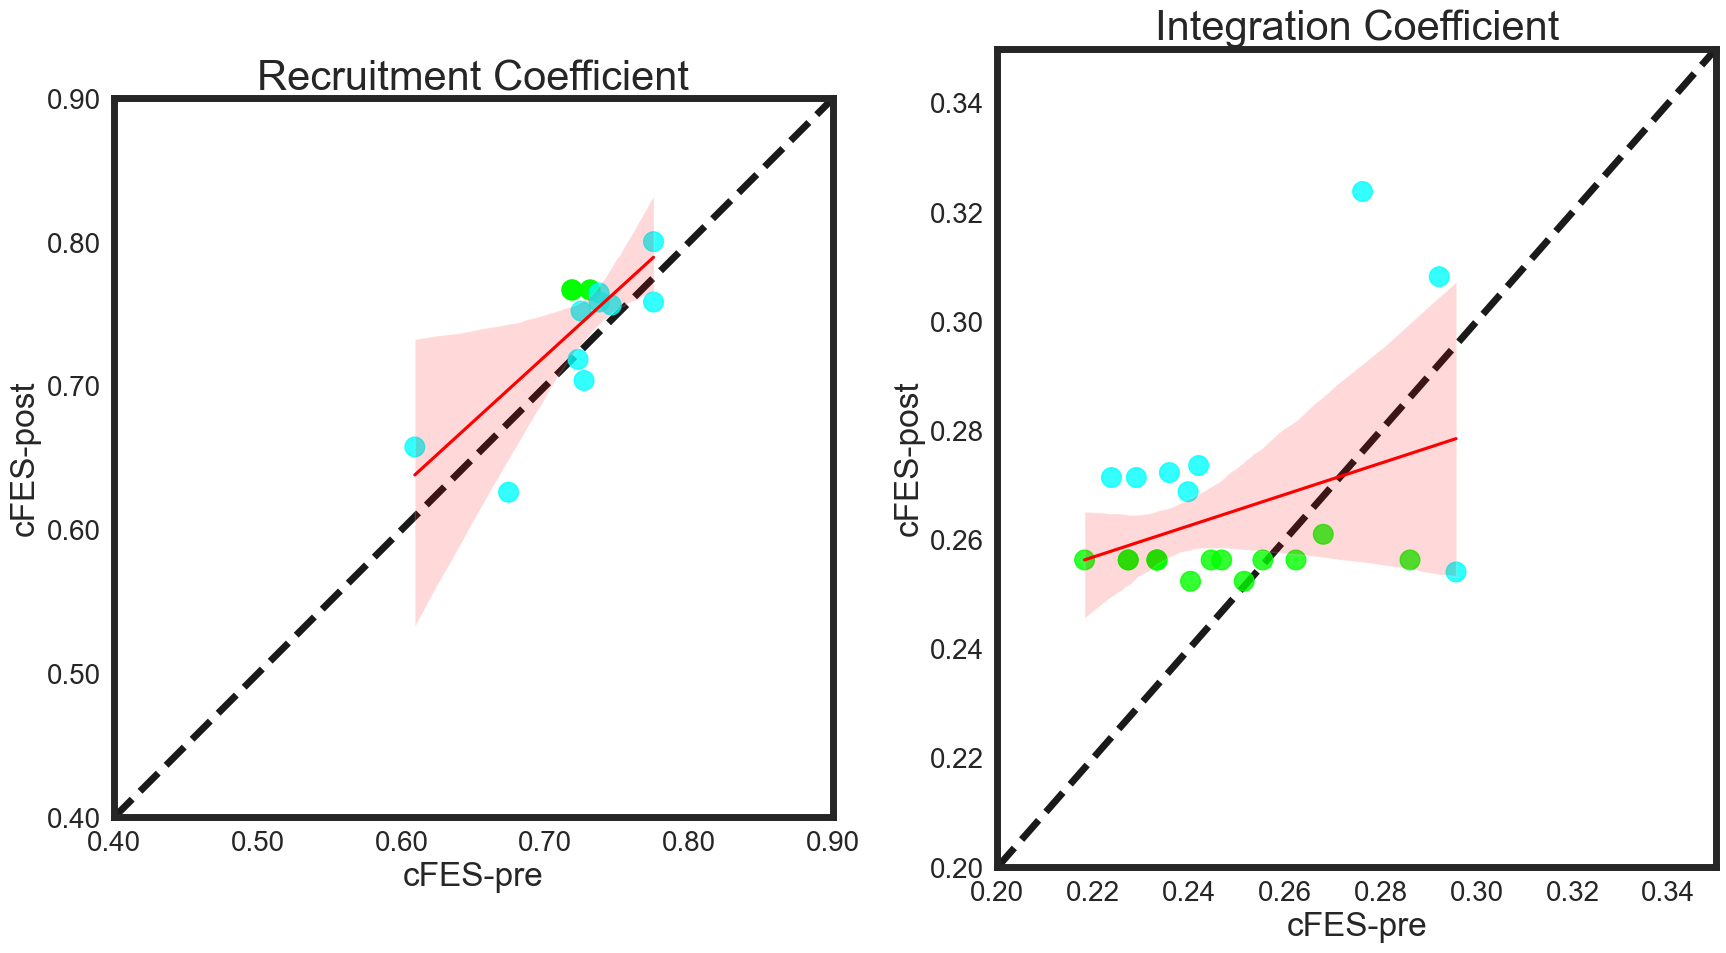

In [35]:
fig, [ax1, ax2] = plt.subplots(nrows=1, ncols=2, figsize=(18, 10))
sns.set(style='white')

# Recruitment 1-3
sns.regplot(x=rec_pre1, y=rec_post1, ci=95, scatter_kws=scatter_kws_rec1, 
            line_kws={"color": "red", 'label': 'Regression line'}, ax=ax1)
ax1.set_xlabel(group_label[0], fontsize=24)
ax1.set_ylabel(group_label[1], fontsize=24)
ax1.set_title('Recruitment Coefficient', fontsize=30)

# Ensure min/max and intervals are the same for both axes
lims = [0.4, 0.90]
ax1.set_xlim(lims)
ax1.set_ylim(lims)
ax1.set_aspect('equal', adjustable='box')
ax1.plot(lims, lims, 'k--', alpha=1.0, zorder=0, label='Identity line', linewidth=5)
ax1.xaxis.set_major_formatter(FormatStrFormatter('%.2f'))
ax1.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
ax1.tick_params(axis='both', labelsize=20)

# Integration 
sns.regplot(x=int_pre1, y=int_post1, ci=95, scatter_kws=scatter_kws_int1, 
            line_kws={"color": "red", 'label': 'Regression line'}, ax=ax2)
ax2.set_xlabel(group_label[0], fontsize=24)
ax2.set_ylabel(group_label[1], fontsize=24)
ax2.set_title('Integration Coefficient', fontsize=30)

lims1 = [0.20, 0.35]
ax2.set_xlim(lims1)
ax2.set_ylim(lims1)
ax2.plot(lims1, lims1, 'k--', alpha=1.0, zorder=0, label='Identity line', linewidth=5)
ax2.xaxis.set_major_formatter(FormatStrFormatter('%.2f'))
ax2.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
ax2.tick_params(axis='both', labelsize=20)

# Customize spines
for ax in [ax1, ax2]:
    for location in ['left', 'right', 'top', 'bottom']:
        ax.spines[location].set_linewidth(5)

plt.grid(False)
plt.rcParams["axes.grid"] = False
plt.tight_layout(pad=2.0)
plt.show()

In [36]:
# S1_cFES_pre, S2_c_pre, S3_cFES_post, S4_c_post
S1_a = S1_cFES_pre
S1_b = S3_cFES_post

# S1_a = S2_c_pre
# S1_b = S4_c_post

# S1_a = S1_cFES_pre
# S1_b = S2_c_pre

#### 15.  Plot allegiance matrix all regions 200x200

In [37]:
# S1_cFES_pre, S2_c_pre, S3_cFES_post, S4_c_post
alg_a = alg_cFES_pre
alg_b = alg_cFES_post
alg_c = alg_pvalue

# alg_a = alg_c_pre
# alg_b = alg_c_post
# alg_c = alg_pvalue

# alg_a = alg_S1_cFES
# alg_b = alg_cFES_post
# alg_c = alg_pvalue


alg_a = np.nan_to_num(alg_a, nan=0)
alg_b = np.nan_to_num(alg_b, nan=0)
alg_c = np.nan_to_num(alg_c, nan=0)

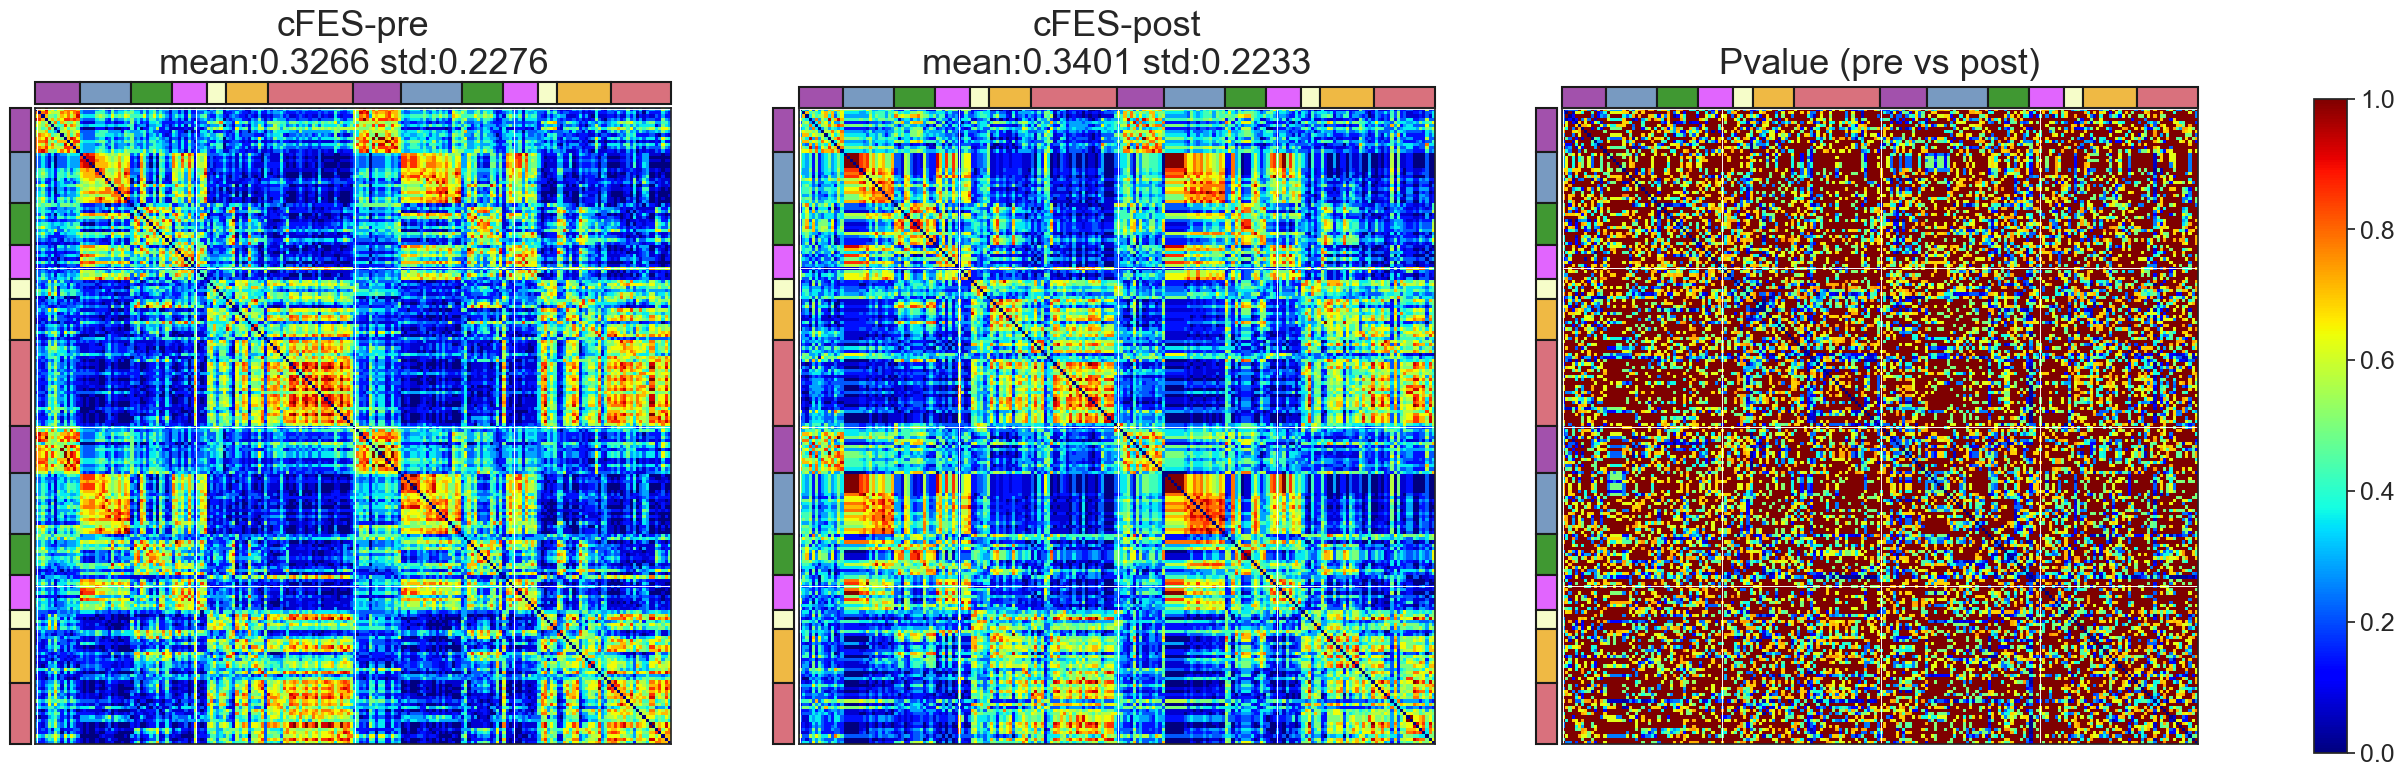

In [38]:
# Allegiance matrix 200x200 
cmap = 'jet'  # jet, rainbow, twilight, twilight_shifted, terrain, gist_earth, CMRmap

# np.set_printoptions(precision=2)
fig, axs = plt.subplots(1, 3, figsize=(30, 10))  # 1 row, 3 columns

# Plot the first matrix
# plt.matshow(allegiance[1], fignum=f.number, vmin = 0, vmax = 1, cmap=cmap)
im1 = axs[0].matshow(alg_a, vmin=0, vmax=1, cmap=cmap)
axs[0].set_title(f'cFES-pre\nmean:{np.mean(alg_a):.4f} std:{np.std(alg_a):.4f}', fontsize=26, y=1.04)

# Plot the second matrix
im2 = axs[1].matshow(alg_b, vmin=0, vmax=1, cmap=cmap)
axs[1].set_title(f'cFES-post\nmean:{np.mean(alg_b):.4f} std:{np.std(alg_b):.4f}', fontsize=26, y=1.04)

# Plot the third matrix
im3 = axs[2].matshow(alg_c, vmin=0, vmax=1, cmap=cmap)
axs[2].set_title(f'Pvalue (pre vs post)', fontsize=26, y=1.04)

# Adjust ticks and gridlines for all subplots
for ax in axs:
    ax.tick_params(
        axis='both',       # changes apply to the x,y-axis
        which='both',      # both major and minor ticks are affected
        bottom=False,      # ticks along the bottom edge are off
        top=False,         # ticks along the top edge are off
        left=False,        # ticks along the left edge are off
        right=False,       # ticks along the right edge are off
        labeltop=False,    # labels along the top edge are off
        labelleft=False    # labels along the left edge are off
    )
    ax.grid(color='white', linestyle='-', linewidth=0.7)

# Add rectangle objects as tick labels (X axis)
xmin, xmax, ymin, ymax = axs[0].axis()
h = (ymax-ymin)/30; space = h/5; i = ymax + space # intercept

axs[0].add_patch(patches.Rectangle((-0.5, i), width=13.5 + 0.5, height=h, facecolor='#A251AC', clip_on=False, linewidth=1.5, edgecolor='k'))
axs[0].add_patch(patches.Rectangle((13.5, i), width=29.5 - 13.5, height=h, facecolor='#789AC1', clip_on=False, linewidth=1.5, edgecolor='k'))
axs[0].add_patch(patches.Rectangle((29.5, i), width=42.5 - 29.5, height=h, facecolor='#409832', clip_on=False, linewidth=1.5, edgecolor='k'))
axs[0].add_patch(patches.Rectangle((42.5, i), width=53.5 - 42.5, height=h, facecolor='#E165FE', clip_on=False, linewidth=1.5, edgecolor='k'))
axs[0].add_patch(patches.Rectangle((53.5, i), width=59.5 - 53.5, height=h, facecolor='#F6FDC9', clip_on=False, linewidth=1.5, edgecolor='k'))
axs[0].add_patch(patches.Rectangle((59.5, i), width=72.5 - 59.5, height=h, facecolor='#EFB944', clip_on=False, linewidth=1.5, edgecolor='k'))
axs[0].add_patch(patches.Rectangle((72.5, i), width=99.5 - 72.5, height=h, facecolor='#D9717D', clip_on=False, linewidth=1.5, edgecolor='k'))
axs[0].add_patch(patches.Rectangle((99.5, i), width=114.5 - 99.5, height=h, facecolor='#A251AC', clip_on=False, linewidth=1.5, edgecolor='k'))
axs[0].add_patch(patches.Rectangle((114.5, i), width=133.5 - 114.5, height=h, facecolor='#789AC1', clip_on=False, linewidth=1.5, edgecolor='k'))
axs[0].add_patch(patches.Rectangle((133.5, i), width=146.5 - 133.5, height=h, facecolor='#409832', clip_on=False, linewidth=1.5, edgecolor='k'))
axs[0].add_patch(patches.Rectangle((146.5, i), width=157.5 - 146.5, height=h, facecolor='#E165FE', clip_on=False, linewidth=1.5, edgecolor='k'))
axs[0].add_patch(patches.Rectangle((157.5, i), width=163.5 - 157.5, height=h, facecolor='#F6FDC9', clip_on=False, linewidth=1.5, edgecolor='k'))
axs[0].add_patch(patches.Rectangle((163.5, i), width=180.5 - 163.5, height=h, facecolor='#EFB944', clip_on=False, linewidth=1.5, edgecolor='k'))
axs[0].add_patch(patches.Rectangle((180.5, i), width=199.5 - 180.5, height=h, facecolor='#D9717D', clip_on=False, linewidth=1.5, edgecolor='k'))
# Add rectangle objects as tick labels (Y axis)
w = (ymax-ymin)/30; i = ymax # intercept
axs[0].add_patch(patches.Rectangle((i+space, -0.5), width=w, height=13.5+0.5, facecolor='#A251AC', clip_on=False, linewidth=1.5, edgecolor='k'))
axs[0].add_patch(patches.Rectangle((i+space, 13.5), width=w, height=29.5-13.5, facecolor='#789AC1', clip_on=False, linewidth=1.5, edgecolor='k'))
axs[0].add_patch(patches.Rectangle((i+space, 29.5), width=w, height=42.5-29.5, facecolor='#409832', clip_on=False, linewidth=1.5, edgecolor='k'))
axs[0].add_patch(patches.Rectangle((i+space, 42.5), width=w, height=53.5-42.5, facecolor='#E165FE', clip_on=False, linewidth=1.5, edgecolor='k'))
axs[0].add_patch(patches.Rectangle((i+space, 53.5), width=w, height=59.5-53.5, facecolor='#F6FDC9', clip_on=False, linewidth=1.5, edgecolor='k'))
axs[0].add_patch(patches.Rectangle((i+space, 59.5), width=w, height=72.5-59.5, facecolor='#EFB944', clip_on=False, linewidth=1.5, edgecolor='k'))
axs[0].add_patch(patches.Rectangle((i+space, 72.5), width=w, height=99.5-72.5, facecolor='#D9717D', clip_on=False, linewidth=1.5, edgecolor='k'))
axs[0].add_patch(patches.Rectangle((i+space, 99.5), width=w, height=114.5-99.5, facecolor='#A251AC', clip_on=False, linewidth=1.5, edgecolor='k'))
axs[0].add_patch(patches.Rectangle((i+space, 114.5), width=w, height=133.5-114.5, facecolor='#789AC1', clip_on=False, linewidth=1.5, edgecolor='k'))
axs[0].add_patch(patches.Rectangle((i+space, 133.5), width=w, height=146.5-133.5, facecolor='#409832', clip_on=False, linewidth=1.5, edgecolor='k'))
axs[0].add_patch(patches.Rectangle((i+space, 146.5), width=w, height=157.5-146.5, facecolor='#E165FE', clip_on=False, linewidth=1.5, edgecolor='k'))
axs[0].add_patch(patches.Rectangle((i+space, 157.5), width=w, height=163.5-157.5, facecolor='#F6FDC9', clip_on=False, linewidth=1.5, edgecolor='k'))
axs[0].add_patch(patches.Rectangle((i+space, 163.5), width=w, height=180.5-163.5, facecolor='#EFB944', clip_on=False, linewidth=1.5, edgecolor='k'))
axs[0].add_patch(patches.Rectangle((i+space, 180.5), width=w, height=199.5-180.5, facecolor='#D9717D', clip_on=False, linewidth=1.5, edgecolor='k'))

axs[1].add_patch(patches.Rectangle((-0.5, i), width=13.5 + 0.5, height=h, facecolor='#A251AC', clip_on=False, linewidth=1.5, edgecolor='k'))
axs[1].add_patch(patches.Rectangle((13.5, i), width=29.5 - 13.5, height=h, facecolor='#789AC1', clip_on=False, linewidth=1.5, edgecolor='k'))
axs[1].add_patch(patches.Rectangle((29.5, i), width=42.5 - 29.5, height=h, facecolor='#409832', clip_on=False, linewidth=1.5, edgecolor='k'))
axs[1].add_patch(patches.Rectangle((42.5, i), width=53.5 - 42.5, height=h, facecolor='#E165FE', clip_on=False, linewidth=1.5, edgecolor='k'))
axs[1].add_patch(patches.Rectangle((53.5, i), width=59.5 - 53.5, height=h, facecolor='#F6FDC9', clip_on=False, linewidth=1.5, edgecolor='k'))
axs[1].add_patch(patches.Rectangle((59.5, i), width=72.5 - 59.5, height=h, facecolor='#EFB944', clip_on=False, linewidth=1.5, edgecolor='k'))
axs[1].add_patch(patches.Rectangle((72.5, i), width=99.5 - 72.5, height=h, facecolor='#D9717D', clip_on=False, linewidth=1.5, edgecolor='k'))
axs[1].add_patch(patches.Rectangle((99.5, i), width=114.5 - 99.5, height=h, facecolor='#A251AC', clip_on=False, linewidth=1.5, edgecolor='k'))
axs[1].add_patch(patches.Rectangle((114.5, i), width=133.5 - 114.5, height=h, facecolor='#789AC1', clip_on=False, linewidth=1.5, edgecolor='k'))
axs[1].add_patch(patches.Rectangle((133.5, i), width=146.5 - 133.5, height=h, facecolor='#409832', clip_on=False, linewidth=1.5, edgecolor='k'))
axs[1].add_patch(patches.Rectangle((146.5, i), width=157.5 - 146.5, height=h, facecolor='#E165FE', clip_on=False, linewidth=1.5, edgecolor='k'))
axs[1].add_patch(patches.Rectangle((157.5, i), width=163.5 - 157.5, height=h, facecolor='#F6FDC9', clip_on=False, linewidth=1.5, edgecolor='k'))
axs[1].add_patch(patches.Rectangle((163.5, i), width=180.5 - 163.5, height=h, facecolor='#EFB944', clip_on=False, linewidth=1.5, edgecolor='k'))
axs[1].add_patch(patches.Rectangle((180.5, i), width=199.5 - 180.5, height=h, facecolor='#D9717D', clip_on=False, linewidth=1.5, edgecolor='k'))
axs[1].add_patch(patches.Rectangle((i+space, -0.5), width=w, height=13.5+0.5, facecolor='#A251AC', clip_on=False, linewidth=1.5, edgecolor='k'))
axs[1].add_patch(patches.Rectangle((i+space, 13.5), width=w, height=29.5-13.5, facecolor='#789AC1', clip_on=False, linewidth=1.5, edgecolor='k'))
axs[1].add_patch(patches.Rectangle((i+space, 29.5), width=w, height=42.5-29.5, facecolor='#409832', clip_on=False, linewidth=1.5, edgecolor='k'))
axs[1].add_patch(patches.Rectangle((i+space, 42.5), width=w, height=53.5-42.5, facecolor='#E165FE', clip_on=False, linewidth=1.5, edgecolor='k'))
axs[1].add_patch(patches.Rectangle((i+space, 53.5), width=w, height=59.5-53.5, facecolor='#F6FDC9', clip_on=False, linewidth=1.5, edgecolor='k'))
axs[1].add_patch(patches.Rectangle((i+space, 59.5), width=w, height=72.5-59.5, facecolor='#EFB944', clip_on=False, linewidth=1.5, edgecolor='k'))
axs[1].add_patch(patches.Rectangle((i+space, 72.5), width=w, height=99.5-72.5, facecolor='#D9717D', clip_on=False, linewidth=1.5, edgecolor='k'))
axs[1].add_patch(patches.Rectangle((i+space, 99.5), width=w, height=114.5-99.5, facecolor='#A251AC', clip_on=False, linewidth=1.5, edgecolor='k'))
axs[1].add_patch(patches.Rectangle((i+space, 114.5), width=w, height=133.5-114.5, facecolor='#789AC1', clip_on=False, linewidth=1.5, edgecolor='k'))
axs[1].add_patch(patches.Rectangle((i+space, 133.5), width=w, height=146.5-133.5, facecolor='#409832', clip_on=False, linewidth=1.5, edgecolor='k'))
axs[1].add_patch(patches.Rectangle((i+space, 146.5), width=w, height=157.5-146.5, facecolor='#E165FE', clip_on=False, linewidth=1.5, edgecolor='k'))
axs[1].add_patch(patches.Rectangle((i+space, 157.5), width=w, height=163.5-157.5, facecolor='#F6FDC9', clip_on=False, linewidth=1.5, edgecolor='k'))
axs[1].add_patch(patches.Rectangle((i+space, 163.5), width=w, height=180.5-163.5, facecolor='#EFB944', clip_on=False, linewidth=1.5, edgecolor='k'))
axs[1].add_patch(patches.Rectangle((i+space, 180.5), width=w, height=199.5-180.5, facecolor='#D9717D', clip_on=False, linewidth=1.5, edgecolor='k'))

axs[2].add_patch(patches.Rectangle((-0.5, i), width=13.5 + 0.5, height=h, facecolor='#A251AC', clip_on=False, linewidth=1.5, edgecolor='k'))
axs[2].add_patch(patches.Rectangle((13.5, i), width=29.5 - 13.5, height=h, facecolor='#789AC1', clip_on=False, linewidth=1.5, edgecolor='k'))
axs[2].add_patch(patches.Rectangle((29.5, i), width=42.5 - 29.5, height=h, facecolor='#409832', clip_on=False, linewidth=1.5, edgecolor='k'))
axs[2].add_patch(patches.Rectangle((42.5, i), width=53.5 - 42.5, height=h, facecolor='#E165FE', clip_on=False, linewidth=1.5, edgecolor='k'))
axs[2].add_patch(patches.Rectangle((53.5, i), width=59.5 - 53.5, height=h, facecolor='#F6FDC9', clip_on=False, linewidth=1.5, edgecolor='k'))
axs[2].add_patch(patches.Rectangle((59.5, i), width=72.5 - 59.5, height=h, facecolor='#EFB944', clip_on=False, linewidth=1.5, edgecolor='k'))
axs[2].add_patch(patches.Rectangle((72.5, i), width=99.5 - 72.5, height=h, facecolor='#D9717D', clip_on=False, linewidth=1.5, edgecolor='k'))
axs[2].add_patch(patches.Rectangle((99.5, i), width=114.5 - 99.5, height=h, facecolor='#A251AC', clip_on=False, linewidth=1.5, edgecolor='k'))
axs[2].add_patch(patches.Rectangle((114.5, i), width=133.5 - 114.5, height=h, facecolor='#789AC1', clip_on=False, linewidth=1.5, edgecolor='k'))
axs[2].add_patch(patches.Rectangle((133.5, i), width=146.5 - 133.5, height=h, facecolor='#409832', clip_on=False, linewidth=1.5, edgecolor='k'))
axs[2].add_patch(patches.Rectangle((146.5, i), width=157.5 - 146.5, height=h, facecolor='#E165FE', clip_on=False, linewidth=1.5, edgecolor='k'))
axs[2].add_patch(patches.Rectangle((157.5, i), width=163.5 - 157.5, height=h, facecolor='#F6FDC9', clip_on=False, linewidth=1.5, edgecolor='k'))
axs[2].add_patch(patches.Rectangle((163.5, i), width=180.5 - 163.5, height=h, facecolor='#EFB944', clip_on=False, linewidth=1.5, edgecolor='k'))
axs[2].add_patch(patches.Rectangle((180.5, i), width=199.5 - 180.5, height=h, facecolor='#D9717D', clip_on=False, linewidth=1.5, edgecolor='k'))
axs[2].add_patch(patches.Rectangle((i+space, -0.5), width=w, height=13.5+0.5, facecolor='#A251AC', clip_on=False, linewidth=1.5, edgecolor='k'))
axs[2].add_patch(patches.Rectangle((i+space, 13.5), width=w, height=29.5-13.5, facecolor='#789AC1', clip_on=False, linewidth=1.5, edgecolor='k'))
axs[2].add_patch(patches.Rectangle((i+space, 29.5), width=w, height=42.5-29.5, facecolor='#409832', clip_on=False, linewidth=1.5, edgecolor='k'))
axs[2].add_patch(patches.Rectangle((i+space, 42.5), width=w, height=53.5-42.5, facecolor='#E165FE', clip_on=False, linewidth=1.5, edgecolor='k'))
axs[2].add_patch(patches.Rectangle((i+space, 53.5), width=w, height=59.5-53.5, facecolor='#F6FDC9', clip_on=False, linewidth=1.5, edgecolor='k'))
axs[2].add_patch(patches.Rectangle((i+space, 59.5), width=w, height=72.5-59.5, facecolor='#EFB944', clip_on=False, linewidth=1.5, edgecolor='k'))
axs[2].add_patch(patches.Rectangle((i+space, 72.5), width=w, height=99.5-72.5, facecolor='#D9717D', clip_on=False, linewidth=1.5, edgecolor='k'))
axs[2].add_patch(patches.Rectangle((i+space, 99.5), width=w, height=114.5-99.5, facecolor='#A251AC', clip_on=False, linewidth=1.5, edgecolor='k'))
axs[2].add_patch(patches.Rectangle((i+space, 114.5), width=w, height=133.5-114.5, facecolor='#789AC1', clip_on=False, linewidth=1.5, edgecolor='k'))
axs[2].add_patch(patches.Rectangle((i+space, 133.5), width=w, height=146.5-133.5, facecolor='#409832', clip_on=False, linewidth=1.5, edgecolor='k'))
axs[2].add_patch(patches.Rectangle((i+space, 146.5), width=w, height=157.5-146.5, facecolor='#E165FE', clip_on=False, linewidth=1.5, edgecolor='k'))
axs[2].add_patch(patches.Rectangle((i+space, 157.5), width=w, height=163.5-157.5, facecolor='#F6FDC9', clip_on=False, linewidth=1.5, edgecolor='k'))
axs[2].add_patch(patches.Rectangle((i+space, 163.5), width=w, height=180.5-163.5, facecolor='#EFB944', clip_on=False, linewidth=1.5, edgecolor='k'))
axs[2].add_patch(patches.Rectangle((i+space, 180.5), width=w, height=199.5-180.5, facecolor='#D9717D', clip_on=False, linewidth=1.5, edgecolor='k'))


# # Add a single colorbar for all subplots
cbar = fig.colorbar(im3, ax=axs, orientation='vertical', fraction=0.02, shrink=0.85) #
cbar.ax.tick_params(labelsize=18)

plt.show()

In [39]:
def threshold_matrices(allegiance_matx):

    # Unpack matrices
    A, B, C = allegiance_matx

    # Detect matrix size
    if A.shape != B.shape or A.shape != C.shape:
        raise ValueError("All matrices must have the same dimensions.")
    
    # Threshold matrix C
    C_thresh = np.where(C <= 0.05, 1, 0)

    # Use C_thresh to threshold A and B
    A_thresh = A * C_thresh
    B_thresh = B * C_thresh

    # Display results
    print(f'Shape of thresholded matrices: {A_thresh.shape}, {B_thresh.shape}, {C_thresh.shape}')
    
    return A_thresh, B_thresh, C_thresh


# Call function
A_thresh, B_thresh, C_thresh = threshold_matrices([alg_a, alg_b, alg_c])


Shape of thresholded matrices: (200, 200), (200, 200), (200, 200)


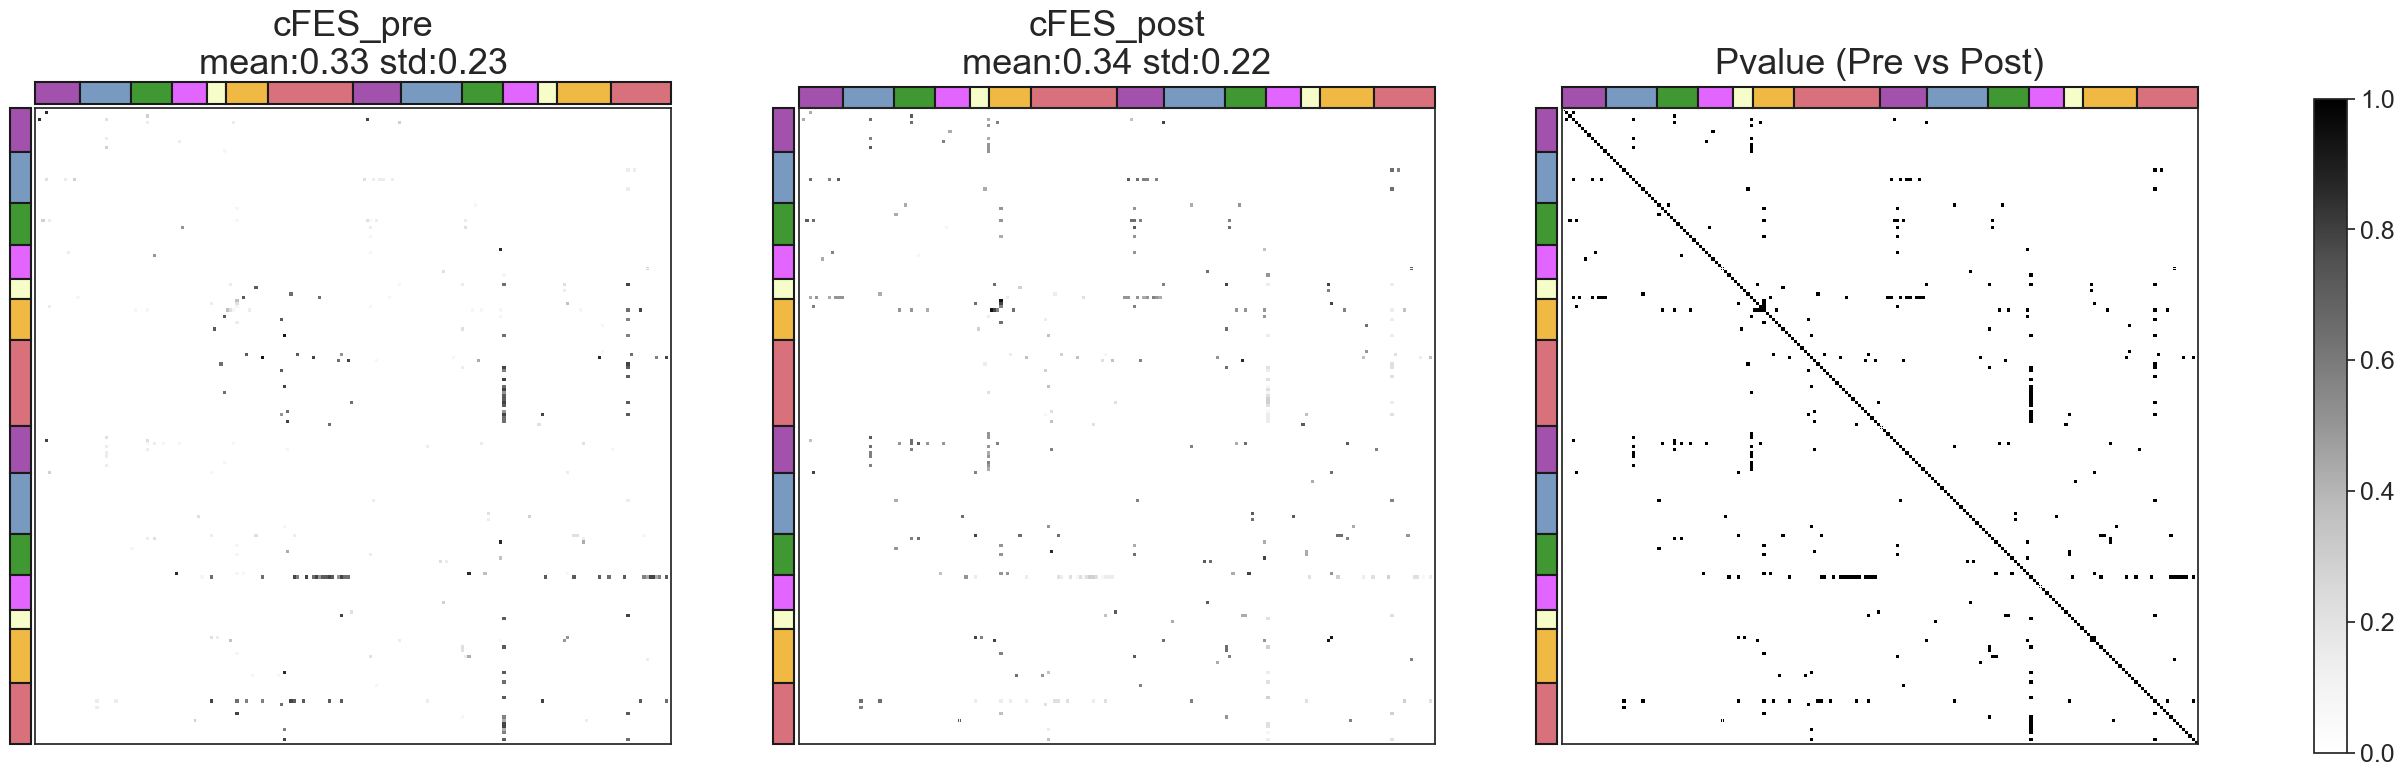

In [40]:
cmap = 'Greys' # Greys jet
# np.set_printoptions(precision=2)
fig, axs = plt.subplots(1, 3, figsize=(30, 10))  # 1 row, 3 columns

# Plot the first matrix
# plt.matshow(allegiance[1], fignum=f.number, vmin = 0, vmax = 1, cmap=cmap)
im1 = axs[0].matshow(A_thresh, vmin=0, vmax=1, cmap=cmap)
axs[0].set_title(f'cFES_pre\nmean:{np.mean(alg_a):.2f} std:{np.std(alg_a):.2f}', fontsize=26, y=1.04)


# Plot the second matrix
im2 = axs[1].matshow(B_thresh, vmin=0, vmax=1, cmap=cmap)
axs[1].set_title(f'cFES_post\nmean:{np.mean(alg_b):.2f} std:{np.std(alg_b):.2f}', fontsize=26, y=1.04)

# Plot the third matrix
im3 = axs[2].matshow(C_thresh, vmin=0, vmax=1, cmap=cmap)
axs[2].set_title(f'Pvalue (Pre vs Post)', fontsize=26, y=1.04)

# Adjust ticks and gridlines for all subplots
for ax in axs:
    ax.tick_params(
        axis='both',       # changes apply to the x,y-axis
        which='both',      # both major and minor ticks are affected
        bottom=False,      # ticks along the bottom edge are off
        top=False,         # ticks along the top edge are off
        left=False,        # ticks along the left edge are off
        right=False,       # ticks along the right edge are off
        labeltop=False,    # labels along the top edge are off
        labelleft=False    # labels along the left edge are off
    )
    ax.grid(color='white', linestyle='-', linewidth=0.7)

# Add rectangle objects as tick labels (X axis)
xmin, xmax, ymin, ymax = axs[0].axis()
h = (ymax-ymin)/30; space = h/5; i = ymax + space # intercept

axs[0].add_patch(patches.Rectangle((-0.5, i), width=13.5 + 0.5, height=h, facecolor='#A251AC', clip_on=False, linewidth=1.5, edgecolor='k'))
axs[0].add_patch(patches.Rectangle((13.5, i), width=29.5 - 13.5, height=h, facecolor='#789AC1', clip_on=False, linewidth=1.5, edgecolor='k'))
axs[0].add_patch(patches.Rectangle((29.5, i), width=42.5 - 29.5, height=h, facecolor='#409832', clip_on=False, linewidth=1.5, edgecolor='k'))
axs[0].add_patch(patches.Rectangle((42.5, i), width=53.5 - 42.5, height=h, facecolor='#E165FE', clip_on=False, linewidth=1.5, edgecolor='k'))
axs[0].add_patch(patches.Rectangle((53.5, i), width=59.5 - 53.5, height=h, facecolor='#F6FDC9', clip_on=False, linewidth=1.5, edgecolor='k'))
axs[0].add_patch(patches.Rectangle((59.5, i), width=72.5 - 59.5, height=h, facecolor='#EFB944', clip_on=False, linewidth=1.5, edgecolor='k'))
axs[0].add_patch(patches.Rectangle((72.5, i), width=99.5 - 72.5, height=h, facecolor='#D9717D', clip_on=False, linewidth=1.5, edgecolor='k'))
axs[0].add_patch(patches.Rectangle((99.5, i), width=114.5 - 99.5, height=h, facecolor='#A251AC', clip_on=False, linewidth=1.5, edgecolor='k'))
axs[0].add_patch(patches.Rectangle((114.5, i), width=133.5 - 114.5, height=h, facecolor='#789AC1', clip_on=False, linewidth=1.5, edgecolor='k'))
axs[0].add_patch(patches.Rectangle((133.5, i), width=146.5 - 133.5, height=h, facecolor='#409832', clip_on=False, linewidth=1.5, edgecolor='k'))
axs[0].add_patch(patches.Rectangle((146.5, i), width=157.5 - 146.5, height=h, facecolor='#E165FE', clip_on=False, linewidth=1.5, edgecolor='k'))
axs[0].add_patch(patches.Rectangle((157.5, i), width=163.5 - 157.5, height=h, facecolor='#F6FDC9', clip_on=False, linewidth=1.5, edgecolor='k'))
axs[0].add_patch(patches.Rectangle((163.5, i), width=180.5 - 163.5, height=h, facecolor='#EFB944', clip_on=False, linewidth=1.5, edgecolor='k'))
axs[0].add_patch(patches.Rectangle((180.5, i), width=199.5 - 180.5, height=h, facecolor='#D9717D', clip_on=False, linewidth=1.5, edgecolor='k'))
# Add rectangle objects as tick labels (Y axis)
w = (ymax-ymin)/30; i = ymax # intercept
axs[0].add_patch(patches.Rectangle((i+space, -0.5), width=w, height=13.5+0.5, facecolor='#A251AC', clip_on=False, linewidth=1.5, edgecolor='k'))
axs[0].add_patch(patches.Rectangle((i+space, 13.5), width=w, height=29.5-13.5, facecolor='#789AC1', clip_on=False, linewidth=1.5, edgecolor='k'))
axs[0].add_patch(patches.Rectangle((i+space, 29.5), width=w, height=42.5-29.5, facecolor='#409832', clip_on=False, linewidth=1.5, edgecolor='k'))
axs[0].add_patch(patches.Rectangle((i+space, 42.5), width=w, height=53.5-42.5, facecolor='#E165FE', clip_on=False, linewidth=1.5, edgecolor='k'))
axs[0].add_patch(patches.Rectangle((i+space, 53.5), width=w, height=59.5-53.5, facecolor='#F6FDC9', clip_on=False, linewidth=1.5, edgecolor='k'))
axs[0].add_patch(patches.Rectangle((i+space, 59.5), width=w, height=72.5-59.5, facecolor='#EFB944', clip_on=False, linewidth=1.5, edgecolor='k'))
axs[0].add_patch(patches.Rectangle((i+space, 72.5), width=w, height=99.5-72.5, facecolor='#D9717D', clip_on=False, linewidth=1.5, edgecolor='k'))
axs[0].add_patch(patches.Rectangle((i+space, 99.5), width=w, height=114.5-99.5, facecolor='#A251AC', clip_on=False, linewidth=1.5, edgecolor='k'))
axs[0].add_patch(patches.Rectangle((i+space, 114.5), width=w, height=133.5-114.5, facecolor='#789AC1', clip_on=False, linewidth=1.5, edgecolor='k'))
axs[0].add_patch(patches.Rectangle((i+space, 133.5), width=w, height=146.5-133.5, facecolor='#409832', clip_on=False, linewidth=1.5, edgecolor='k'))
axs[0].add_patch(patches.Rectangle((i+space, 146.5), width=w, height=157.5-146.5, facecolor='#E165FE', clip_on=False, linewidth=1.5, edgecolor='k'))
axs[0].add_patch(patches.Rectangle((i+space, 157.5), width=w, height=163.5-157.5, facecolor='#F6FDC9', clip_on=False, linewidth=1.5, edgecolor='k'))
axs[0].add_patch(patches.Rectangle((i+space, 163.5), width=w, height=180.5-163.5, facecolor='#EFB944', clip_on=False, linewidth=1.5, edgecolor='k'))
axs[0].add_patch(patches.Rectangle((i+space, 180.5), width=w, height=199.5-180.5, facecolor='#D9717D', clip_on=False, linewidth=1.5, edgecolor='k'))

axs[1].add_patch(patches.Rectangle((-0.5, i), width=13.5 + 0.5, height=h, facecolor='#A251AC', clip_on=False, linewidth=1.5, edgecolor='k'))
axs[1].add_patch(patches.Rectangle((13.5, i), width=29.5 - 13.5, height=h, facecolor='#789AC1', clip_on=False, linewidth=1.5, edgecolor='k'))
axs[1].add_patch(patches.Rectangle((29.5, i), width=42.5 - 29.5, height=h, facecolor='#409832', clip_on=False, linewidth=1.5, edgecolor='k'))
axs[1].add_patch(patches.Rectangle((42.5, i), width=53.5 - 42.5, height=h, facecolor='#E165FE', clip_on=False, linewidth=1.5, edgecolor='k'))
axs[1].add_patch(patches.Rectangle((53.5, i), width=59.5 - 53.5, height=h, facecolor='#F6FDC9', clip_on=False, linewidth=1.5, edgecolor='k'))
axs[1].add_patch(patches.Rectangle((59.5, i), width=72.5 - 59.5, height=h, facecolor='#EFB944', clip_on=False, linewidth=1.5, edgecolor='k'))
axs[1].add_patch(patches.Rectangle((72.5, i), width=99.5 - 72.5, height=h, facecolor='#D9717D', clip_on=False, linewidth=1.5, edgecolor='k'))
axs[1].add_patch(patches.Rectangle((99.5, i), width=114.5 - 99.5, height=h, facecolor='#A251AC', clip_on=False, linewidth=1.5, edgecolor='k'))
axs[1].add_patch(patches.Rectangle((114.5, i), width=133.5 - 114.5, height=h, facecolor='#789AC1', clip_on=False, linewidth=1.5, edgecolor='k'))
axs[1].add_patch(patches.Rectangle((133.5, i), width=146.5 - 133.5, height=h, facecolor='#409832', clip_on=False, linewidth=1.5, edgecolor='k'))
axs[1].add_patch(patches.Rectangle((146.5, i), width=157.5 - 146.5, height=h, facecolor='#E165FE', clip_on=False, linewidth=1.5, edgecolor='k'))
axs[1].add_patch(patches.Rectangle((157.5, i), width=163.5 - 157.5, height=h, facecolor='#F6FDC9', clip_on=False, linewidth=1.5, edgecolor='k'))
axs[1].add_patch(patches.Rectangle((163.5, i), width=180.5 - 163.5, height=h, facecolor='#EFB944', clip_on=False, linewidth=1.5, edgecolor='k'))
axs[1].add_patch(patches.Rectangle((180.5, i), width=199.5 - 180.5, height=h, facecolor='#D9717D', clip_on=False, linewidth=1.5, edgecolor='k'))
axs[1].add_patch(patches.Rectangle((i+space, -0.5), width=w, height=13.5+0.5, facecolor='#A251AC', clip_on=False, linewidth=1.5, edgecolor='k'))
axs[1].add_patch(patches.Rectangle((i+space, 13.5), width=w, height=29.5-13.5, facecolor='#789AC1', clip_on=False, linewidth=1.5, edgecolor='k'))
axs[1].add_patch(patches.Rectangle((i+space, 29.5), width=w, height=42.5-29.5, facecolor='#409832', clip_on=False, linewidth=1.5, edgecolor='k'))
axs[1].add_patch(patches.Rectangle((i+space, 42.5), width=w, height=53.5-42.5, facecolor='#E165FE', clip_on=False, linewidth=1.5, edgecolor='k'))
axs[1].add_patch(patches.Rectangle((i+space, 53.5), width=w, height=59.5-53.5, facecolor='#F6FDC9', clip_on=False, linewidth=1.5, edgecolor='k'))
axs[1].add_patch(patches.Rectangle((i+space, 59.5), width=w, height=72.5-59.5, facecolor='#EFB944', clip_on=False, linewidth=1.5, edgecolor='k'))
axs[1].add_patch(patches.Rectangle((i+space, 72.5), width=w, height=99.5-72.5, facecolor='#D9717D', clip_on=False, linewidth=1.5, edgecolor='k'))
axs[1].add_patch(patches.Rectangle((i+space, 99.5), width=w, height=114.5-99.5, facecolor='#A251AC', clip_on=False, linewidth=1.5, edgecolor='k'))
axs[1].add_patch(patches.Rectangle((i+space, 114.5), width=w, height=133.5-114.5, facecolor='#789AC1', clip_on=False, linewidth=1.5, edgecolor='k'))
axs[1].add_patch(patches.Rectangle((i+space, 133.5), width=w, height=146.5-133.5, facecolor='#409832', clip_on=False, linewidth=1.5, edgecolor='k'))
axs[1].add_patch(patches.Rectangle((i+space, 146.5), width=w, height=157.5-146.5, facecolor='#E165FE', clip_on=False, linewidth=1.5, edgecolor='k'))
axs[1].add_patch(patches.Rectangle((i+space, 157.5), width=w, height=163.5-157.5, facecolor='#F6FDC9', clip_on=False, linewidth=1.5, edgecolor='k'))
axs[1].add_patch(patches.Rectangle((i+space, 163.5), width=w, height=180.5-163.5, facecolor='#EFB944', clip_on=False, linewidth=1.5, edgecolor='k'))
axs[1].add_patch(patches.Rectangle((i+space, 180.5), width=w, height=199.5-180.5, facecolor='#D9717D', clip_on=False, linewidth=1.5, edgecolor='k'))

axs[2].add_patch(patches.Rectangle((-0.5, i), width=13.5 + 0.5, height=h, facecolor='#A251AC', clip_on=False, linewidth=1.5, edgecolor='k'))
axs[2].add_patch(patches.Rectangle((13.5, i), width=29.5 - 13.5, height=h, facecolor='#789AC1', clip_on=False, linewidth=1.5, edgecolor='k'))
axs[2].add_patch(patches.Rectangle((29.5, i), width=42.5 - 29.5, height=h, facecolor='#409832', clip_on=False, linewidth=1.5, edgecolor='k'))
axs[2].add_patch(patches.Rectangle((42.5, i), width=53.5 - 42.5, height=h, facecolor='#E165FE', clip_on=False, linewidth=1.5, edgecolor='k'))
axs[2].add_patch(patches.Rectangle((53.5, i), width=59.5 - 53.5, height=h, facecolor='#F6FDC9', clip_on=False, linewidth=1.5, edgecolor='k'))
axs[2].add_patch(patches.Rectangle((59.5, i), width=72.5 - 59.5, height=h, facecolor='#EFB944', clip_on=False, linewidth=1.5, edgecolor='k'))
axs[2].add_patch(patches.Rectangle((72.5, i), width=99.5 - 72.5, height=h, facecolor='#D9717D', clip_on=False, linewidth=1.5, edgecolor='k'))
axs[2].add_patch(patches.Rectangle((99.5, i), width=114.5 - 99.5, height=h, facecolor='#A251AC', clip_on=False, linewidth=1.5, edgecolor='k'))
axs[2].add_patch(patches.Rectangle((114.5, i), width=133.5 - 114.5, height=h, facecolor='#789AC1', clip_on=False, linewidth=1.5, edgecolor='k'))
axs[2].add_patch(patches.Rectangle((133.5, i), width=146.5 - 133.5, height=h, facecolor='#409832', clip_on=False, linewidth=1.5, edgecolor='k'))
axs[2].add_patch(patches.Rectangle((146.5, i), width=157.5 - 146.5, height=h, facecolor='#E165FE', clip_on=False, linewidth=1.5, edgecolor='k'))
axs[2].add_patch(patches.Rectangle((157.5, i), width=163.5 - 157.5, height=h, facecolor='#F6FDC9', clip_on=False, linewidth=1.5, edgecolor='k'))
axs[2].add_patch(patches.Rectangle((163.5, i), width=180.5 - 163.5, height=h, facecolor='#EFB944', clip_on=False, linewidth=1.5, edgecolor='k'))
axs[2].add_patch(patches.Rectangle((180.5, i), width=199.5 - 180.5, height=h, facecolor='#D9717D', clip_on=False, linewidth=1.5, edgecolor='k'))
axs[2].add_patch(patches.Rectangle((i+space, -0.5), width=w, height=13.5+0.5, facecolor='#A251AC', clip_on=False, linewidth=1.5, edgecolor='k'))
axs[2].add_patch(patches.Rectangle((i+space, 13.5), width=w, height=29.5-13.5, facecolor='#789AC1', clip_on=False, linewidth=1.5, edgecolor='k'))
axs[2].add_patch(patches.Rectangle((i+space, 29.5), width=w, height=42.5-29.5, facecolor='#409832', clip_on=False, linewidth=1.5, edgecolor='k'))
axs[2].add_patch(patches.Rectangle((i+space, 42.5), width=w, height=53.5-42.5, facecolor='#E165FE', clip_on=False, linewidth=1.5, edgecolor='k'))
axs[2].add_patch(patches.Rectangle((i+space, 53.5), width=w, height=59.5-53.5, facecolor='#F6FDC9', clip_on=False, linewidth=1.5, edgecolor='k'))
axs[2].add_patch(patches.Rectangle((i+space, 59.5), width=w, height=72.5-59.5, facecolor='#EFB944', clip_on=False, linewidth=1.5, edgecolor='k'))
axs[2].add_patch(patches.Rectangle((i+space, 72.5), width=w, height=99.5-72.5, facecolor='#D9717D', clip_on=False, linewidth=1.5, edgecolor='k'))
axs[2].add_patch(patches.Rectangle((i+space, 99.5), width=w, height=114.5-99.5, facecolor='#A251AC', clip_on=False, linewidth=1.5, edgecolor='k'))
axs[2].add_patch(patches.Rectangle((i+space, 114.5), width=w, height=133.5-114.5, facecolor='#789AC1', clip_on=False, linewidth=1.5, edgecolor='k'))
axs[2].add_patch(patches.Rectangle((i+space, 133.5), width=w, height=146.5-133.5, facecolor='#409832', clip_on=False, linewidth=1.5, edgecolor='k'))
axs[2].add_patch(patches.Rectangle((i+space, 146.5), width=w, height=157.5-146.5, facecolor='#E165FE', clip_on=False, linewidth=1.5, edgecolor='k'))
axs[2].add_patch(patches.Rectangle((i+space, 157.5), width=w, height=163.5-157.5, facecolor='#F6FDC9', clip_on=False, linewidth=1.5, edgecolor='k'))
axs[2].add_patch(patches.Rectangle((i+space, 163.5), width=w, height=180.5-163.5, facecolor='#EFB944', clip_on=False, linewidth=1.5, edgecolor='k'))
axs[2].add_patch(patches.Rectangle((i+space, 180.5), width=w, height=199.5-180.5, facecolor='#D9717D', clip_on=False, linewidth=1.5, edgecolor='k'))


# # Add a single colorbar for all subplots
cbar = fig.colorbar(im3, ax=axs, orientation='vertical', fraction=0.02, shrink=0.85) #
cbar.ax.tick_params(labelsize=18)

plt.show()

#### 16. Plot allegiance matrix for SMN region only  

In [41]:
## S1_cFES_pre, S2_c_pre, S3_cFES_post, S4_c_post
# Slice rows and columns from 15:31 and 116:135
 
# alg_a = alg_cFES_pre
# alg_b = alg_cFES_post
# alg_c = alg_pvalue

s1 = alg_a[14:30, 14:30]     # Shape (16, 16)
s2 = alg_a[14:30, 115:134]   # Shape (16, 19)
s3 = alg_a[115:134, 14:30]   # Shape (19, 16)
s4 = alg_a[115:134, 115:134] # Shape (19, 19)

print(f'Shape pvalue: {s1.shape} {s2.shape} {s3.shape} {s4.shape}')

# Stack slices to form a 35x35 matrix
top_half = np.hstack((s1, s2))  # Shape (16, 35)
bottom_half = np.hstack((s3, s4))  # Shape (19, 35)
alg_smn_a = np.vstack((top_half, bottom_half))  # Shape (35, 35)

s1 = alg_b[14:30, 14:30]     # Shape (16, 16)
s2 = alg_b[14:30, 115:134]   # Shape (16, 19)
s3 = alg_b[115:134, 14:30]   # Shape (19, 16)
s4 = alg_b[115:134, 115:134] # Shape (19, 19)

# Stack slices to form a 35x35 matrix
top_half = np.hstack((s1, s2))  # Shape (16, 35)
bottom_half = np.hstack((s3, s4))  # Shape (19, 35)
alg_smn_b = np.vstack((top_half, bottom_half))  # Shape (35, 35)

s1 = alg_c[14:30, 14:30]     # Shape (16, 16)
s2 = alg_c[14:30, 115:134]   # Shape (16, 19)
s3 = alg_c[115:134, 14:30]   # Shape (19, 16)
s4 = alg_c[115:134, 115:134] # Shape (19, 19)

# Stack slices to form a 35x35 matrix
top_half = np.hstack((s1, s2))  # Shape (16, 35)
bottom_half = np.hstack((s3, s4))  # Shape (19, 35)
pvalue_smn_alg_c = np.vstack((top_half, bottom_half))  # Shape (35, 35)

print(f'Allegiance SMN PreFES:{alg_smn_a.shape} {alg_smn_b.shape} {pvalue_smn_alg_c.shape}')

Shape pvalue: (16, 16) (16, 19) (19, 16) (19, 19)
Allegiance SMN PreFES:(35, 35) (35, 35) (35, 35)


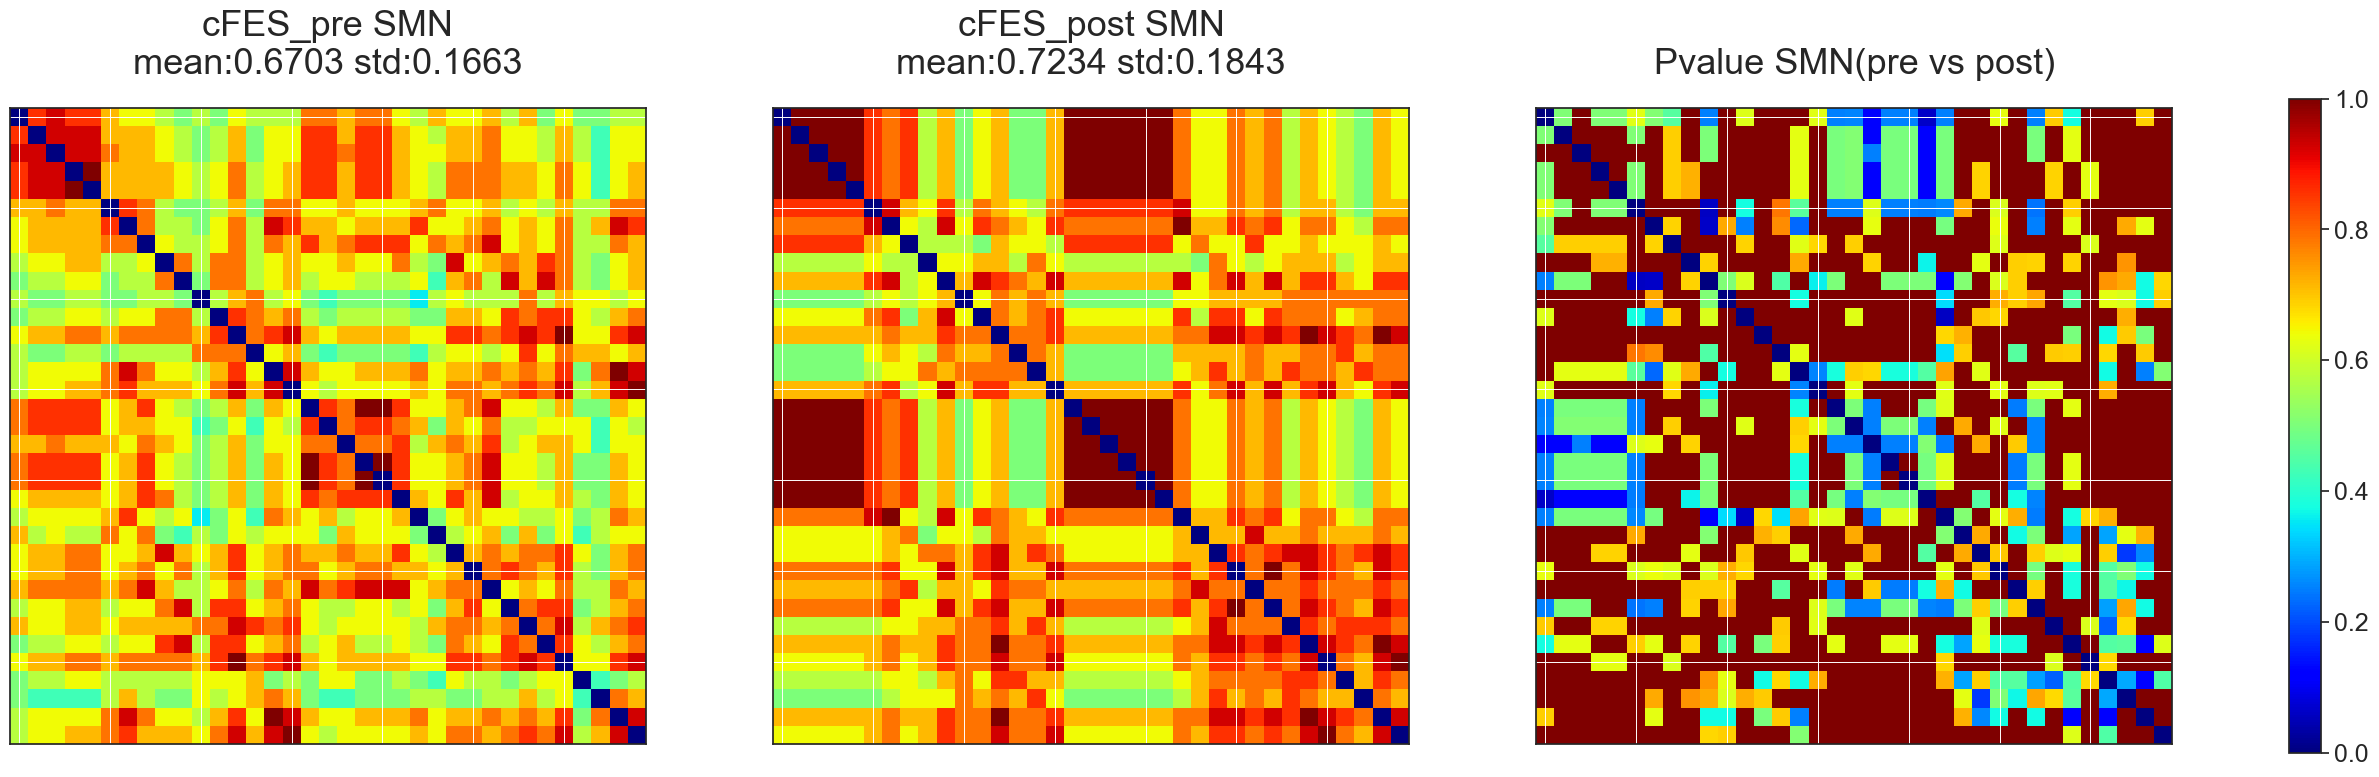

In [42]:
cmap = 'jet'  # jet, rainbow, twilight, twilight_shifted, terrain, gist_earth, CMRmap
# 
# np.set_printoptions(precision=2)
fig, axs = plt.subplots(1, 3, figsize=(30, 10))  # 1 row, 3 columns

# Plot the first matrix 
im1 = axs[0].matshow(alg_smn_a, vmin=0, vmax=1, cmap=cmap)
axs[0].set_title(f'cFES_pre SMN\nmean:{np.mean(alg_smn_a):.4f} std:{np.std(alg_smn_a):.4f}', fontsize=26, y=1.04)


# Plot the second matrix
im2 = axs[1].matshow(alg_smn_b, vmin=0, vmax=1, cmap=cmap)
axs[1].set_title(f'cFES_post SMN\nmean:{np.mean(alg_smn_b):.4f} std:{np.std(alg_smn_b):.4f}', fontsize=26, y=1.04)

# Plot the third matrix
im3 = axs[2].matshow(pvalue_smn_alg_c, vmin=0, vmax=1, cmap=cmap)
axs[2].set_title(f'Pvalue SMN(pre vs post)', fontsize=26, y=1.04)

# Adjust ticks and gridlines for all subplots
for ax in axs:
    ax.tick_params(
        axis='both',       # changes apply to the x,y-axis
        which='both',      # both major and minor ticks are affected
        bottom=False,      # ticks along the bottom edge are off
        top=False,         # ticks along the top edge are off
        left=False,        # ticks along the left edge are off
        right=False,       # ticks along the right edge are off
        labeltop=False,    # labels along the top edge are off
        labelleft=False    # labels along the left edge are off
    )
    ax.grid(color='white', linestyle='-', linewidth=0.7)

# Add rectangle objects as tick labels (X axis)
xmin, xmax, ymin, ymax = axs[0].axis()
h = (ymax-ymin)/30; space = h/5; i = ymax + space # intercept


# # Add a single colorbar for all subplots
cbar = fig.colorbar(im3, ax=axs, orientation='vertical', fraction=0.02, shrink=0.85) #
cbar.ax.tick_params(labelsize=18)

plt.show()

In [43]:
A_thresh_smn, B_thresh_smn, C_thresh_smn = threshold_matrices([alg_smn_a, alg_smn_b, pvalue_smn_alg_c])

Shape of thresholded matrices: (35, 35), (35, 35), (35, 35)


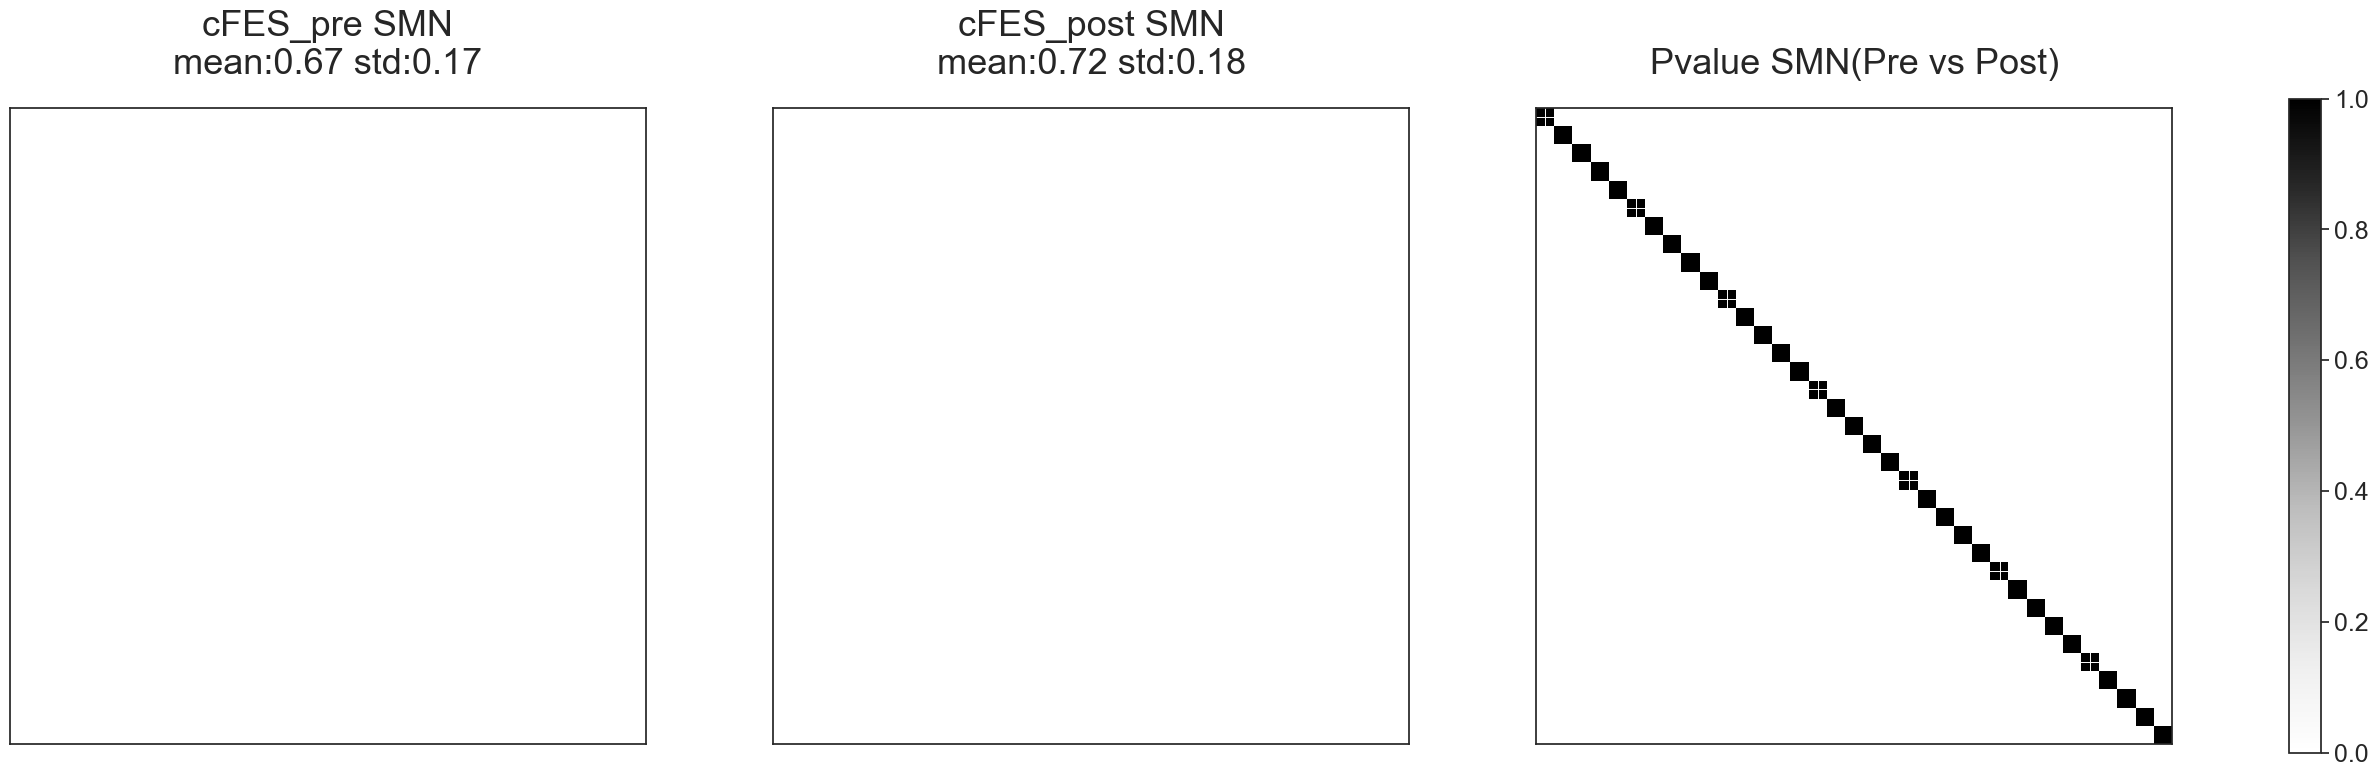

In [44]:
cmap = 'Greys'  # Greys, jet, rainbow, twilight, twilight_shifted, terrain, gist_earth, CMRmap
# 
# np.set_printoptions(precision=2)
fig, axs = plt.subplots(1, 3, figsize=(30, 10))  # 1 row, 3 columns

# Plot the first matrix 
im1 = axs[0].matshow(A_thresh_smn, vmin=0, vmax=1, cmap=cmap)
axs[0].set_title(f'cFES_pre SMN\nmean:{np.mean(alg_smn_a):.2f} std:{np.std(alg_smn_a):.2f}', fontsize=26, y=1.04)

# Plot the second matrix
im2 = axs[1].matshow(B_thresh_smn, vmin=0, vmax=1, cmap=cmap)
axs[1].set_title(f'cFES_post SMN\nmean:{np.mean(alg_smn_b):.2f} std:{np.std(alg_smn_b):.2f}', fontsize=26, y=1.04)

# Plot the third matrix
im3 = axs[2].matshow(C_thresh_smn, vmin=0, vmax=1, cmap=cmap)
axs[2].set_title(f'Pvalue SMN(Pre vs Post)', fontsize=26, y=1.04)

# Adjust ticks and gridlines for all subplots
for ax in axs:
    ax.tick_params(
        axis='both',       # changes apply to the x,y-axis
        which='both',      # both major and minor ticks are affected
        bottom=False,      # ticks along the bottom edge are off
        top=False,         # ticks along the top edge are off
        left=False,        # ticks along the left edge are off
        right=False,       # ticks along the right edge are off
        labeltop=False,    # labels along the top edge are off
        labelleft=False    # labels along the left edge are off
    )
    ax.grid(color='white', linestyle='-', linewidth=0.7)

# Add rectangle objects as tick labels (X axis)
xmin, xmax, ymin, ymax = axs[0].axis()
h = (ymax-ymin)/30; space = h/5; i = ymax + space # intercept


# # Add a single colorbar for all subplots
cbar = fig.colorbar(im3, ax=axs, orientation='vertical', fraction=0.02, shrink=0.85) #
cbar.ax.tick_params(labelsize=18)

plt.show()

In [45]:
end_time = datetime.now()
print('Duration: {}'.format(end_time - start_time))


Duration: 1:09:14.664897


In [46]:
# import pkg_resources

# installed_packages = pkg_resources.working_set
# for package in installed_packages:
#     print(f"{package.key}=={package.version}")